### Best colleges in India

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

### Loading data set

In [2]:
data = pd.read_csv('./College_data.csv')
data.head()

College_Name       State       Stream  \
0    Indian Institute of Technology Madras   Tamil nadu  Engineering   
1  College of Engineering, Anna University   Tamil nadu  Engineering   
2              NIT Trichy, Tiruchirappalli   Tamil nadu  Engineering   
3          Vellore Institute of Technology   Tamil nadu  Engineering   
4     SRM Engineering College, Kanchipuram   Tamil nadu  Engineering   

     UG_fee    PG_fee Rating Academic Accommodation Faculty Infrastructure  \
0    75,116    23,070    8.7        9           7.9     8.7            8.8   
1    50,000    50,000    8.4      8.7           7.7     8.1            8.7   
2  1,49,250    99,250    8.5      8.6           7.8     8.2            8.7   
3  1,98,000  1,83,000    8.3      8.3             8     7.8            8.9   
4  2,60,000  1,70,000    7.2      6.5           6.6     6.9            7.6   

  Placement Social_Life  
0       8.8           9  
1       8.3         8.7  
2       8.8         8.7  
3       8.5         8.5  
4       7.1         8.3

In [3]:
data.shape

(6788, 12)

In [4]:
data.size

81456

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6788 entries, 0 to 6787
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   College_Name    6788 non-null   object
 1   State           6788 non-null   object
 2   Stream          6788 non-null   object
 3   UG_fee          6788 non-null   object
 4   PG_fee          6788 non-null   object
 5   Rating          6788 non-null   object
 6   Academic        6788 non-null   object
 7   Accommodation   6788 non-null   object
 8   Faculty         6788 non-null   object
 9   Infrastructure  6788 non-null   object
 10  Placement       6788 non-null   object
 11  Social_Life     6788 non-null   object
dtypes: object(12)
memory usage: 636.5+ KB


In [6]:
data.isnull().sum()

College_Name      0
State             0
Stream            0
UG_fee            0
PG_fee            0
Rating            0
Academic          0
Accommodation     0
Faculty           0
Infrastructure    0
Placement         0
Social_Life       0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.columns

Index(['College_Name', 'State', 'Stream', 'UG_fee', 'PG_fee', 'Rating',
       'Academic', 'Accommodation', 'Faculty', 'Infrastructure', 'Placement',
       'Social_Life'],
      dtype='object')

### Sorting by State name

In [9]:
data.sort_values(by='State',ascending=True,inplace=True)
data.reset_index(drop=True,inplace=True)
data

College_Name        State  \
0     Dr. B R Ambedkar Institute of Technology, Port...      Andaman   
1     Dr. B R Ambedkar Institute of Technology, Port...      Andaman   
2              Jawaharlal Nehru Rajkeeya Mahavidyalaya       Andaman   
3     Dr. B R Ambedkar Institute of Technology, Port...      Andaman   
4              Jawaharlal Nehru Rajkeeya Mahavidyalaya       Andaman   
...                                                 ...          ...   
6783                  Management Development Institute   West bengal   
6784                   Praxis Business School, Kolkata   West bengal   
6785                             The Neotia University   West bengal   
6786                     Institute of Management Study   West bengal   
6787                  Acharya Prafulla Chandra College   West bengal   

           Stream    UG_fee    PG_fee Rating Academic Accommodation Faculty  \
0      Management     4,780        --     --       --            --      --   
1     Engineering    12,083     4,780     --       --            --      --   
2      Management       843        --    6.6      8.5             5       7   
3         Science    29,964        --     --       --            --      --   
4         Science       939     1,128    6.6      8.5             5       7   
...           ...       ...       ...    ...      ...           ...     ...   
6783   Management  4,41,000        --    8.4      8.3           8.7     8.4   
6784   Management  3,89,000        --    8.6      9.3             8       9   
6785   Management    98,000  1,06,000    8.2      8.7           7.5     8.5   
6786   Management    55,000  2,60,000    7.3      7.8           6.4     7.7   
6787         Arts     2,249    18,300    7.5      8.2           6.5     8.3   

     Infrastructure Placement Social_Life  
0                --        --          --  
1                --        --          --  
2               7.5       2.5           9  
3                --        --          --  
4               7.5       2.5           9  
...             ...       ...         ...  
6783            8.2       7.9         8.6  
6784            8.3       8.7           8  
6785            8.2       7.8         8.6  
6786            7.6       7.3         6.8  
6787              8       5.8         7.9  

[6788 rows x 12 columns]

### Changing null values to NAN

In [10]:
data.apply(data.value_counts).loc['--'].sum()

10615.0

In [11]:
data.replace('--', np.nan, inplace=True)

### Changing   to float

In [12]:
data['UG_fee'] = data['UG_fee'].str.replace(',', '')
data['PG_fee'] = data['PG_fee'].str.replace(',', '')

In [13]:
data['UG_fee'] = data['UG_fee'].astype(float)
data['PG_fee'] = data['PG_fee'].astype(float)

In [14]:
data

College_Name        State  \
0     Dr. B R Ambedkar Institute of Technology, Port...      Andaman   
1     Dr. B R Ambedkar Institute of Technology, Port...      Andaman   
2              Jawaharlal Nehru Rajkeeya Mahavidyalaya       Andaman   
3     Dr. B R Ambedkar Institute of Technology, Port...      Andaman   
4              Jawaharlal Nehru Rajkeeya Mahavidyalaya       Andaman   
...                                                 ...          ...   
6783                  Management Development Institute   West bengal   
6784                   Praxis Business School, Kolkata   West bengal   
6785                             The Neotia University   West bengal   
6786                     Institute of Management Study   West bengal   
6787                  Acharya Prafulla Chandra College   West bengal   

           Stream    UG_fee    PG_fee Rating Academic Accommodation Faculty  \
0      Management    4780.0       NaN    NaN      NaN           NaN     NaN   
1     Engineering   12083.0    4780.0    NaN      NaN           NaN     NaN   
2      Management     843.0       NaN    6.6      8.5             5       7   
3         Science   29964.0       NaN    NaN      NaN           NaN     NaN   
4         Science     939.0    1128.0    6.6      8.5             5       7   
...           ...       ...       ...    ...      ...           ...     ...   
6783   Management  441000.0       NaN    8.4      8.3           8.7     8.4   
6784   Management  389000.0       NaN    8.6      9.3             8       9   
6785   Management   98000.0  106000.0    8.2      8.7           7.5     8.5   
6786   Management   55000.0  260000.0    7.3      7.8           6.4     7.7   
6787         Arts    2249.0   18300.0    7.5      8.2           6.5     8.3   

     Infrastructure Placement Social_Life  
0               NaN       NaN         NaN  
1               NaN       NaN         NaN  
2               7.5       2.5           9  
3               NaN       NaN         NaN  
4               7.5       2.5           9  
...             ...       ...         ...  
6783            8.2       7.9         8.6  
6784            8.3       8.7           8  
6785            8.2       7.8         8.6  
6786            7.6       7.3         6.8  
6787              8       5.8         7.9  

[6788 rows x 12 columns]

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6788 entries, 0 to 6787
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   College_Name    6788 non-null   object 
 1   State           6788 non-null   object 
 2   Stream          6788 non-null   object 
 3   UG_fee          5618 non-null   float64
 4   PG_fee          3477 non-null   float64
 5   Rating          6056 non-null   object 
 6   Academic        5942 non-null   object 
 7   Accommodation   5899 non-null   object 
 8   Faculty         5881 non-null   object 
 9   Infrastructure  5872 non-null   object 
 10  Placement       5898 non-null   object 
 11  Social_Life     5834 non-null   object 
dtypes: float64(2), object(10)
memory usage: 636.5+ KB


In [16]:
data['UG_fee'] = data['UG_fee'].astype(float)
data['Infrastructure'] = data['Infrastructure'].astype(float)
data['Rating'] = data['Rating'].astype(float)
data['Academic'] = data['Academic'].astype(float)
data['Accommodation'] = data['Accommodation'].astype(float)
data['Faculty'] = data['Faculty'].astype(float)
data['Placement'] = data['Placement'].astype(float)
data['Social_Life'] = data['Social_Life'].astype(float)

In [17]:
data['Average'] = (data['Academic']+data['Accommodation']+data['Faculty']+data['Infrastructure']+data['Placement']+data['Social_Life'])/6

In [18]:
data.head()

College_Name    State       Stream  \
0  Dr. B R Ambedkar Institute of Technology, Port...  Andaman   Management   
1  Dr. B R Ambedkar Institute of Technology, Port...  Andaman  Engineering   
2           Jawaharlal Nehru Rajkeeya Mahavidyalaya   Andaman   Management   
3  Dr. B R Ambedkar Institute of Technology, Port...  Andaman      Science   
4           Jawaharlal Nehru Rajkeeya Mahavidyalaya   Andaman      Science   

    UG_fee  PG_fee  Rating  Academic  Accommodation  Faculty  Infrastructure  \
0   4780.0     NaN     NaN       NaN            NaN      NaN             NaN   
1  12083.0  4780.0     NaN       NaN            NaN      NaN             NaN   
2    843.0     NaN     6.6       8.5            5.0      7.0             7.5   
3  29964.0     NaN     NaN       NaN            NaN      NaN             NaN   
4    939.0  1128.0     6.6       8.5            5.0      7.0             7.5   

   Placement  Social_Life   Average  
0        NaN          NaN       NaN  
1        NaN          NaN       NaN  
2        2.5          9.0  6.583333  
3        NaN          NaN       NaN  
4        2.5          9.0  6.583333

### College count by States

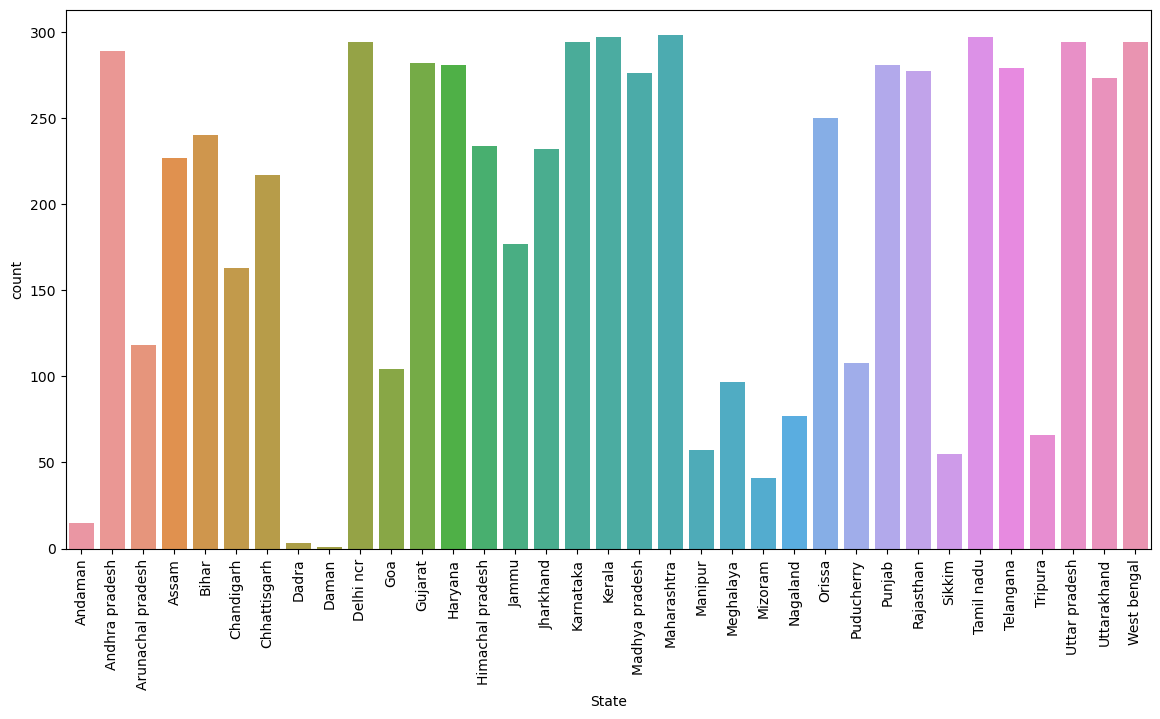

In [19]:
plt.figure(figsize=(14,7))
sns.countplot(data=data,x='State')
plt.xticks(rotation=90)
plt.show()

#### Mizoram has less than 50 colleges

### Streams

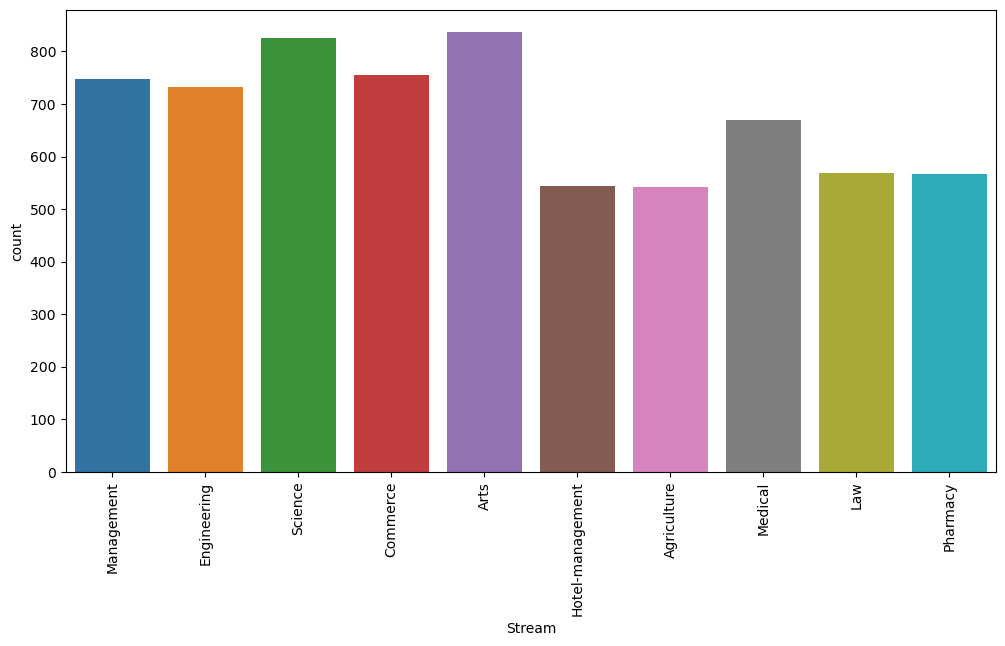

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='Stream')
plt.xticks(rotation=90)
plt.show()

#### In India Arts and Science colleges are high in number

### HIghest UG fee Colleges

In [21]:
high_UG_fee = data.sort_values(by='UG_fee',ascending=False)
high_UG_fee.nlargest(25,columns='UG_fee')

College_Name           State  \
5791  Chalmeda Anand Rao Institute of Medical Sciences        Telangana   
1928                    Indian Institute of Management          Gujarat   
6767                    Indian Institute of Management      West bengal   
868                   Katihar Medical College, Katihar            Bihar   
56    GSL Medical College and General Hospital, Raja...  Andhra pradesh   
5766  Kaloji Narayana Rao University of Health Scien...       Telangana   
2183                  Management Development Institute          Haryana   
1434                  Management Development Institute        Delhi ncr   
2955                    Indian Institute of Management        Karnataka   
3400                    Indian Institute of Management           Kerala   
3924               D Y Patil Medical College, Kolhapur      Maharashtra   
1942                                              MICA          Gujarat   
2860                                              XLRI        Jharkhand   
4650                   Aarupadai Veedu Medical College       Puducherry   
4652  Sri Venkateshwaraa Medical College Hospital & ...      Puducherry   
6196                    Indian Institute of Management    Uttar pradesh   
3928          Dr DY Patil Medical College Hospital and      Maharashtra   
6315            Shri Guru Ram Rai Institute of Medical      Uttarakhand   
4640    Vinayaka Missions Medical College and Hospital       Puducherry   
3237                  Amrita School of Medicine, Kochi           Kerala   
5014                    Indian Institute of Management        Rajasthan   
4469    Institute of Medical Sciences and SUM Hospital           Orissa   
4040      SP Jain Institute of Management and Research      Maharashtra   
5255      Sikkim Manipal Institute of Medical Sciences           Sikkim   
4477             Kalinga Institute of Medical Sciences           Orissa   

          Stream     UG_fee     PG_fee  Rating  Academic  Accommodation  \
5791     Medical  5000000.0  7200000.0     6.8       7.8            6.5   
1928  Management  2800000.0  1000000.0     9.0       8.9            8.9   
6767  Management  2700000.0   268000.0     8.9       8.9            8.8   
868      Medical  2650000.0  1150000.0     8.6       8.7            8.7   
56       Medical  2420000.0  2420000.0     7.9       8.1            6.8   
5766     Medical  2420000.0   225000.0     8.3       8.8            8.0   
2183  Management  2358000.0   319668.0     9.0       8.8            8.9   
1434  Management  2358000.0   319668.0     9.0       8.8            8.9   
2955  Management  2300000.0  2750000.0     9.1       9.0            9.0   
3400  Management  2250000.0    45000.0     8.9       8.9            8.9   
3924     Medical  2200000.0  3220000.0     6.7       7.0            5.6   
1942  Management  2100000.0    70000.0     9.0       8.8            9.0   
2860  Management  2095000.0   950000.0     9.1       9.1            8.9   
4650     Medical  2018550.0        NaN     7.5       7.9            6.6   
4652     Medical  2000000.0   600000.0     7.1       7.6            6.4   
6196  Management  1925000.0   750000.0     8.8       8.8            8.8   
3928     Medical  1900000.0  2500000.0     7.6       7.9            6.6   
6315     Medical  1881000.0  1028825.0     7.9       8.0            7.5   
4640     Medical  1868550.0  3350000.0     8.1       8.5            7.5   
3237     Medical  1868000.0  2898400.0     8.3       8.8            7.3   
5014  Management  1850000.0  1300000.0     9.0       8.9            8.9   
4469     Medical  1790000.0   400000.0     8.2       9.0            6.0   
4040  Management  1750000.0   150000.0     8.7       9.0            8.3   
5255     Medical  1700000.0    98000.0     7.1       7.6            6.2   
4477     Medical  1675000.0  1875000.0     8.2       8.4            7.4   

      Faculty  Infrastructure  Placement  Social_Life   Average  
5791      7.0             7.0        6.6          5.8  6.783333  
1928     

### Top 25 highest UG_Fee Courses and states

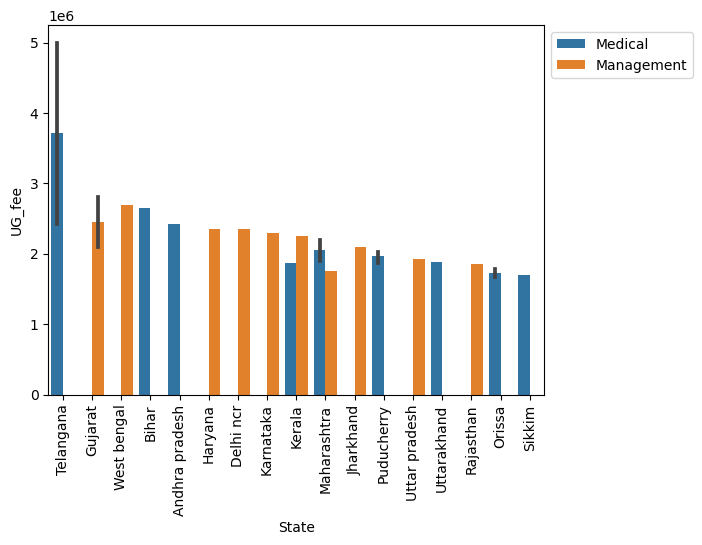

In [22]:
sns.barplot(data=(high_UG_fee.nlargest(25,columns='UG_fee')),x='State',y='UG_fee',hue='Stream')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

#### Medical and Management fees are high

### High PG Fee courses

In [23]:
high_PG_fee = data.sort_values(by='PG_fee',ascending=False)
high_PG_fee.nlargest(25,columns='PG_fee')

College_Name           State  \
816                   Jawaharlal Nehru Medical College            Bihar   
5791  Chalmeda Anand Rao Institute of Medical Sciences        Telangana   
4841                         Indian School of Business           Punjab   
5606                         Indian School of Business        Telangana   
759                       Al-Karim University, Katihar            Bihar   
4646         Pondicherry Institute of Medical Sciences       Puducherry   
4640    Vinayaka Missions Medical College and Hospital       Puducherry   
2964        Jawaharlal Nehru Medical College, Belagavi        Karnataka   
3924               D Y Patil Medical College, Kolhapur      Maharashtra   
3237                  Amrita School of Medicine, Kochi           Kerala   
2955                    Indian Institute of Management        Karnataka   
223          Maharajah's Institute of Medical Sciences   Andhra pradesh   
19    Alluri Sitarama Raju Academy of Medical Sciences   Andhra pradesh   
3928          Dr DY Patil Medical College Hospital and      Maharashtra   
3925                  MGM Medical College, Navi Mumbai      Maharashtra   
56    GSL Medical College and General Hospital, Raja...  Andhra pradesh   
5025                          Amity University, Jaipur        Rajasthan   
4651  Sree Lakshmi Narayana Institute of Medical Sci...      Puducherry   
3979  Krishna Institute of Medical Sciences University      Maharashtra   
53                                GITAM, Visakhapatnam   Andhra pradesh   
4477             Kalinga Institute of Medical Sciences           Orissa   
1690                 Government Medical College, Surat          Gujarat   
16    Dr. Pinnamaneni Siddhartha Institute of Medica...  Andhra pradesh   
4547                  Siksha 'O' Anusandhan University           Orissa   
2956                          Kasturba Medical College        Karnataka   

          Stream     UG_fee     PG_fee  Rating  Academic  Accommodation  \
816      Medical    61500.0  8230000.0     8.3       8.3            8.2   
5791     Medical  5000000.0  7200000.0     6.8       7.8            6.5   
4841  Management  1020000.0  4760000.0     8.9       9.0            8.9   
5606  Management  1020000.0  4700000.0     9.3       8.9            9.4   
759      Medical   379000.0  3780000.0     NaN       NaN            NaN   
4646     Medical  1600000.0  3450000.0     8.0       8.0            7.0   
4640     Medical  1868550.0  3350000.0     8.1       8.5            7.5   
2964     Medical  1430000.0  3310000.0     8.0       8.6            7.3   
3924     Medical  2200000.0  3220000.0     6.7       7.0            5.6   
3237     Medical  1868000.0  2898400.0     8.3       8.8            7.3   
2955  Management  2300000.0  2750000.0     9.1       9.0            9.0   
223      Medical    15000.0  2668050.0     8.0       8.6            7.2   
19       Medical   760725.0  2668050.0     9.1       9.3            8.7   
3928     Medical  1900000.0  2500000.0     7.6       7.9            6.6   
3925     Medical    95000.0  2500000.0     7.2       7.8            6.0   
56       Medical  2420000.0  2420000.0     7.9       8.1            6.8   
5025  Management   334000.0  2240000.0     8.0       7.8            7.6   
4651     Medical    75000.0  2150000.0     8.0       8.3            8.1   
3979     Medical   105000.0  2100000.0     8.1       8.4            7.0   
53       Medical   200000.0  2075700.0     8.3       8.3            8.0   
4477     Medical  1675000.0  1875000.0     8.2       8.4            7.4   
1690     Medical   957000.0  1808333.0     7.8       8.1            7.2   
16       Medical   140000.0  1790500.0     6.3       7.0            6.0   
4547     Medical    85000.0  1790000.0     8.3       8.6            7.6   
2956     Medical   124000.0  1660000.0     9.0       9.0            8.1   

      Faculty  Infrastructure  Placement  Social_Life   Average  
816       8.2             8.1        8.6          8.4  8.300000  
5791     

### PG course fee

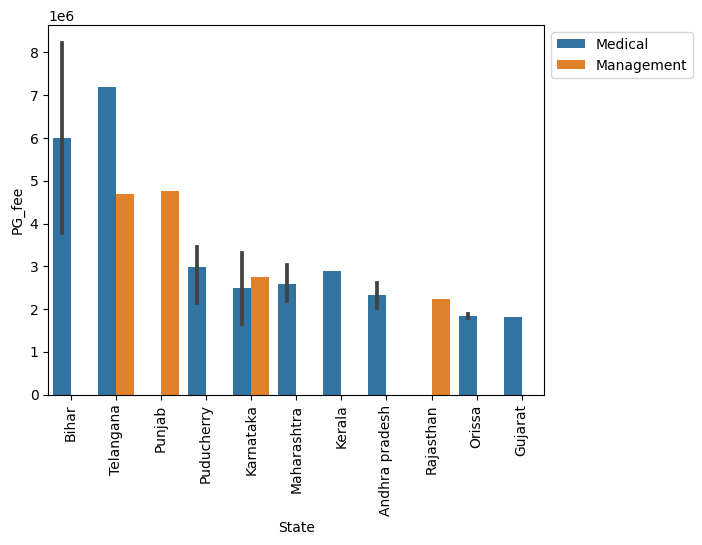

In [24]:
sns.barplot(data=(high_PG_fee.nlargest(25,columns='PG_fee')),x='State',y='PG_fee',hue='Stream')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

#### Medical PG has high course fee

### Average Rating of Indian colleges

In [25]:
Indian_avg = data.sort_values(by='Average',ascending=False)
Indian_avg

College_Name        State  \
4790                               Kanya Mahavidyalaya        Punjab   
4706                               Kanya Mahavidyalaya        Punjab   
4748                               Kanya Mahavidyalaya        Punjab   
3853                      Armed Forces Medical College   Maharashtra   
3935                      Armed Forces Medical College   Maharashtra   
...                                                 ...          ...   
6726  Jiaganj College of Engineering & Technology, M...  West bengal   
6727                          Malda Polytechnic, Malda   West bengal   
6730                      Swami Vivekananda University   West bengal   
6734                              Falakata Polytechnic   West bengal   
6739            Diamond Harbour Government Polytechnic   West bengal   

           Stream    UG_fee   PG_fee  Rating  Academic  Accommodation  \
4790         Arts       NaN      NaN     9.8       9.8            9.7   
4706  Agriculture       NaN      NaN     9.8       9.8            9.7   
4748     Commerce       NaN      NaN     9.8       9.8            9.7   
3853      Science       NaN      NaN     9.7       9.4            9.7   
3935      Medical   34000.0  31870.0     9.7       9.4            9.7   
...           ...       ...      ...     ...       ...            ...   
6726  Agriculture   33000.0      NaN     NaN       NaN            NaN   
6727  Agriculture     885.0      NaN     NaN       NaN            NaN   
6730  Agriculture  116000.0      NaN     NaN       NaN            NaN   
6734  Agriculture     885.0      NaN     NaN       NaN            NaN   
6739  Agriculture     885.0      NaN     NaN       NaN            NaN   

      Faculty  Infrastructure  Placement  Social_Life  Average  
4790      9.8             9.7        9.6          9.9     9.75  
4706      9.8             9.7        9.6          9.9     9.75  
4748      9.8             9.7        9.6          9.9     9.75  
3853      9.7             9.6        9.9          9.9     9.70  
3935      9.7             9.6        9.9          9.9     9.70  
...       ...             ...        ...          ...      ...  
6726      NaN             NaN        NaN          NaN      NaN  
6727      NaN             NaN        NaN          NaN      NaN  
6730      NaN             NaN        NaN          NaN      NaN  
6734      NaN             NaN        NaN          NaN      NaN  
6739      NaN             NaN        NaN          NaN      NaN  

[6788 rows x 13 columns]

#### Highest average rating by states and courses

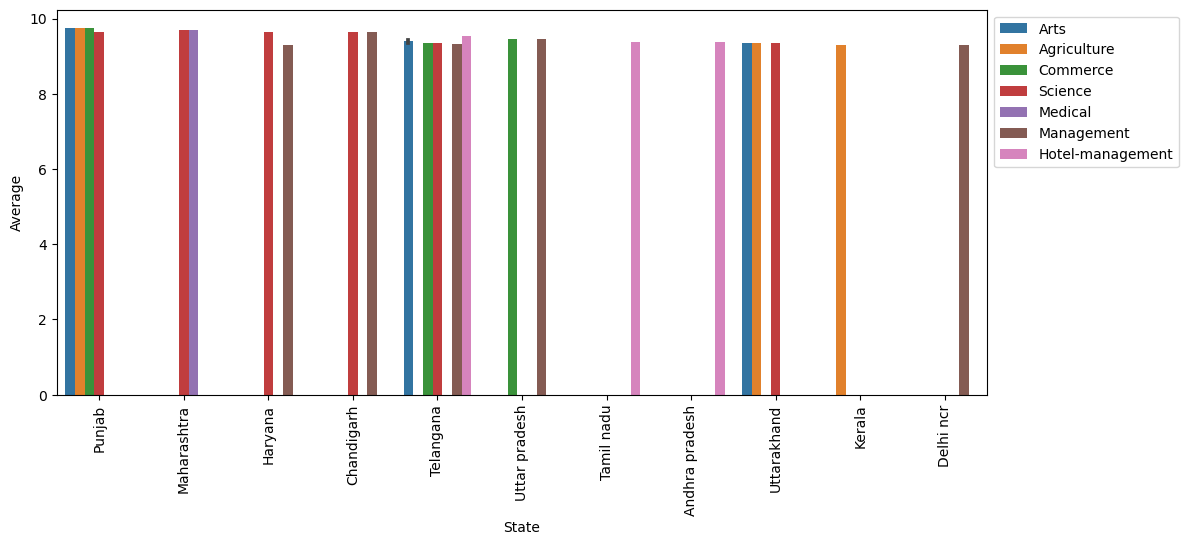

In [26]:
plt.figure(figsize=(12,5))
sns.barplot(data=(Indian_avg.nlargest(25,columns='Average')),x='State',y='Average',hue='Stream')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

#### Highest average rated arts colleges are in Telengana and Uttarakhand, In kerala agricultaral college has highest rating 

In [77]:
Indian_acdmc = data.sort_values(by='Academic',ascending=False)
Indian_acdmc

College_Name        State  \
5557    Chevalier T.Thomas Elizabeth College For Women    Tamil nadu   
4508  College of Agricultural Engineering and Techno...       Orissa   
4457  Indian Institute of Tourism and Travel Managem...       Orissa   
972   University Institute of Tourism and Hospitalit...   Chandigarh   
5730               Sarojini Naidu Vanita Mahavidyalaya     Telangana   
...                                                 ...          ...   
6726  Jiaganj College of Engineering & Technology, M...  West bengal   
6727                          Malda Polytechnic, Malda   West bengal   
6730                      Swami Vivekananda University   West bengal   
6734                              Falakata Polytechnic   West bengal   
6739            Diamond Harbour Government Polytechnic   West bengal   

           Stream    UG_fee    PG_fee  Rating  Academic  Accommodation  \
5557          Law       NaN       NaN     8.5       9.8            6.0   
4508  Agriculture   35195.0       NaN     8.0       9.8            8.5   
4457   Management  108850.0  188600.0     8.7       9.8            7.3   
972    Management  166000.0       NaN     9.6       9.8            9.4   
5730         Arts    5050.0    7200.0     9.4       9.8            9.8   
...           ...       ...       ...     ...       ...            ...   
6726  Agriculture   33000.0       NaN     NaN       NaN            NaN   
6727  Agriculture     885.0       NaN     NaN       NaN            NaN   
6730  Agriculture  116000.0       NaN     NaN       NaN            NaN   
6734  Agriculture     885.0       NaN     NaN       NaN            NaN   
6739  Agriculture     885.0       NaN     NaN       NaN            NaN   

      Faculty  Infrastructure  Placement  Social_Life   Average  
5557      8.6             9.3        8.5          8.9  8.516667  
4508      8.2             7.5        6.0          8.0  8.000000  
4457      9.7             9.3        8.5          7.3  8.650000  
972       9.8             9.6        9.6          9.6  9.633333  
5730      8.5             9.5        9.0          9.5  9.350000  
...       ...             ...        ...          ...       ...  
6726      NaN             NaN        NaN          NaN       NaN  
6727      NaN             NaN        NaN          NaN       NaN  
6730      NaN             NaN        NaN          NaN       NaN  
6734      NaN             NaN        NaN          NaN       NaN  
6739      NaN             NaN        NaN          NaN       NaN  

[6788 rows x 13 columns]

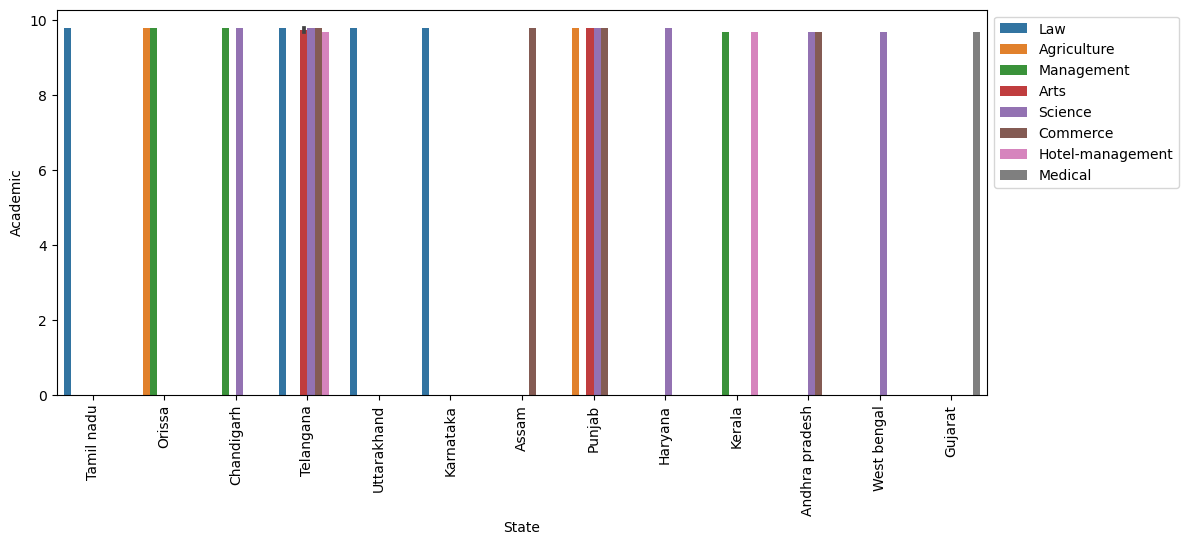

In [78]:
plt.figure(figsize=(12,5))
sns.barplot(data=(Indian_acdmc.nlargest(25,columns='Academic')),x='State',y='Academic',hue='Stream')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

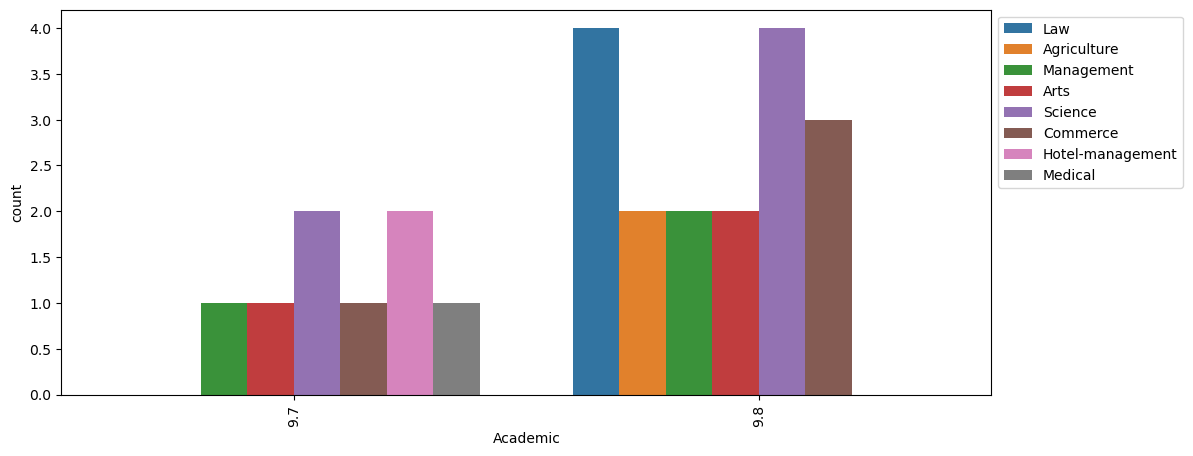

In [79]:
plt.figure(figsize=(12,5))
sns.countplot(data=(Indian_acdmc.nlargest(25,columns='Academic')),x='Academic',hue='Stream')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

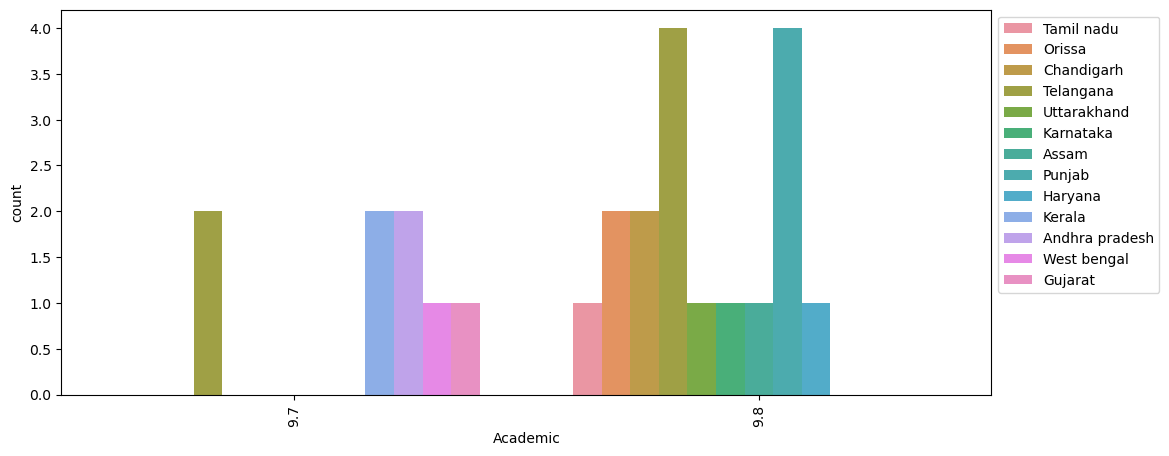

In [82]:
plt.figure(figsize=(12,5))
sns.countplot(data=(Indian_acdmc.nlargest(25,columns='Academic')),x='Academic',hue='State')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [83]:
Indian_acco = data.sort_values(by='Accommodation',ascending=False)
Indian_acco

College_Name        State  \
5730               Sarojini Naidu Vanita Mahavidyalaya     Telangana   
5637               Sarojini Naidu Vanita Mahavidyalaya     Telangana   
3368                    CSI Institute Of Legal Studies        Kerala   
5685               Sarojini Naidu Vanita Mahavidyalaya     Telangana   
3291  Indian School of Business Management and Admin...       Kerala   
...                                                 ...          ...   
6726  Jiaganj College of Engineering & Technology, M...  West bengal   
6727                          Malda Polytechnic, Malda   West bengal   
6730                      Swami Vivekananda University   West bengal   
6734                              Falakata Polytechnic   West bengal   
6739            Diamond Harbour Government Polytechnic   West bengal   

           Stream    UG_fee   PG_fee  Rating  Academic  Accommodation  \
5730         Arts    5050.0   7200.0     9.4       9.8            9.8   
5637      Science   12200.0  25975.0     9.4       9.8            9.8   
3368          Law   40000.0      NaN     8.8       8.8            9.8   
5685     Commerce    7800.0  11000.0     9.4       9.8            9.8   
3291          Law    7900.0      NaN     9.2       9.7            9.7   
...           ...       ...      ...     ...       ...            ...   
6726  Agriculture   33000.0      NaN     NaN       NaN            NaN   
6727  Agriculture     885.0      NaN     NaN       NaN            NaN   
6730  Agriculture  116000.0      NaN     NaN       NaN            NaN   
6734  Agriculture     885.0      NaN     NaN       NaN            NaN   
6739  Agriculture     885.0      NaN     NaN       NaN            NaN   

      Faculty  Infrastructure  Placement  Social_Life   Average  
5730      8.5             9.5        9.0          9.5  9.350000  
5637      8.5             9.5        9.0          9.5  9.350000  
3368      8.5             9.0        8.0          8.5  8.766667  
5685      8.5             9.5        9.0          9.5  9.350000  
3291      9.3             9.3        9.0          8.3  9.216667  
...       ...             ...        ...          ...       ...  
6726      NaN             NaN        NaN          NaN       NaN  
6727      NaN             NaN        NaN          NaN       NaN  
6730      NaN             NaN        NaN          NaN       NaN  
6734      NaN             NaN        NaN          NaN       NaN  
6739      NaN             NaN        NaN          NaN       NaN  

[6788 rows x 13 columns]

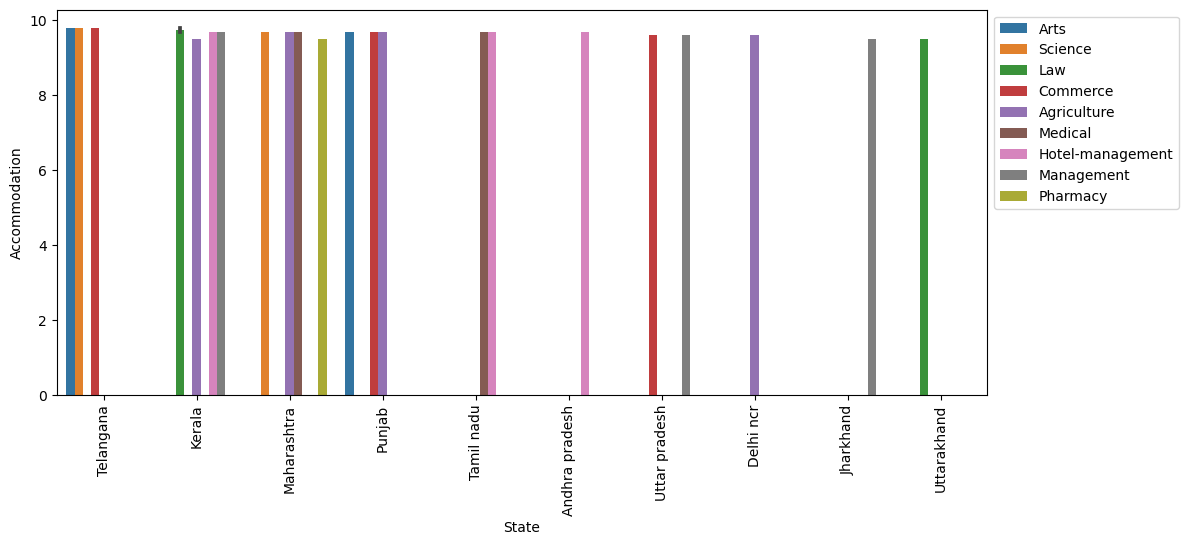

In [85]:
plt.figure(figsize=(12,5))
sns.barplot(data=(Indian_acco.nlargest(25,columns='Accommodation')),x='State',y='Accommodation',hue='Stream')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [76]:
data.columns

Index(['College_Name', 'State', 'Stream', 'UG_fee', 'PG_fee', 'Rating',
       'Academic', 'Accommodation', 'Faculty', 'Infrastructure', 'Placement',
       'Social_Life', 'Average'],
      dtype='object')

### Colleges in Kerala

In [27]:
kerala_data = data.query("State=='Kerala'")
kerala_data.drop(columns=['State'],inplace=True)
kerala_data

College_Name    Stream   UG_fee  \
3171                              Sacred Heart College       Arts   6170.0   
3172                     Government College, Kasaragod       Arts      NaN   
3173                   St. Albert's College, Ernakulam       Arts  18000.0   
3174              Jai Bharath Arts and Science College   Commerce      NaN   
3175         Gems Arts and Science College, Malappuram   Commerce      NaN   
...                                                 ...       ...      ...   
3463     National University of Advanced Legal Studies        Law  21000.0   
3464  Trivandrum University College, Thiruvananthapu...   Science   1555.0   
3465                              Sacred Heart College    Science   6970.0   
3466               Rajagiri College of Social Sciences    Science  23853.0   
3467        Government Law College, Thiruvananthapuram        Law   6500.0   

        PG_fee  Rating  Academic  Accommodation  Faculty  Infrastructure  \
3171  115600.0     8.5       8.9            7.5      8.6             8.8   
3172       NaN     8.2       8.3            7.4      9.1             8.7   
3173   37500.0     7.1       7.9            6.4      7.7             7.0   
3174       NaN     6.4       6.6            6.6      6.7             6.2   
3175       NaN     7.8       8.2            6.5      8.3             8.3   
...        ...     ...       ...            ...      ...             ...   
3463  125000.0     7.4       7.3            6.0      8.2             6.3   
3464    3595.0     8.5       9.2            8.0      8.6             9.0   
3465   10200.0     8.5       8.9            7.5      8.6             8.8   
3466   46803.0     8.5       8.8            8.5      8.8             8.5   
3467    9010.0     7.4       8.8            8.0      8.2             7.8   

      Placement  Social_Life   Average  
3171        8.0          9.1  8.483333  
3172        6.6          9.0  8.183333  
3173        6.5          6.9  7.066667  
3174        6.0          6.5  6.433333  
3175        6.2          9.1  7.766667  
...         ...          ...       ...  
3463        8.3          8.1  7.366667  
3464        7.5          8.6  8.483333  
3465        8.0          9.1  8.483333  
3466        8.0          8.1  8.450000  
3467        4.6          7.0  7.400000  

[297 rows x 12 columns]

### Kerala stream countplot

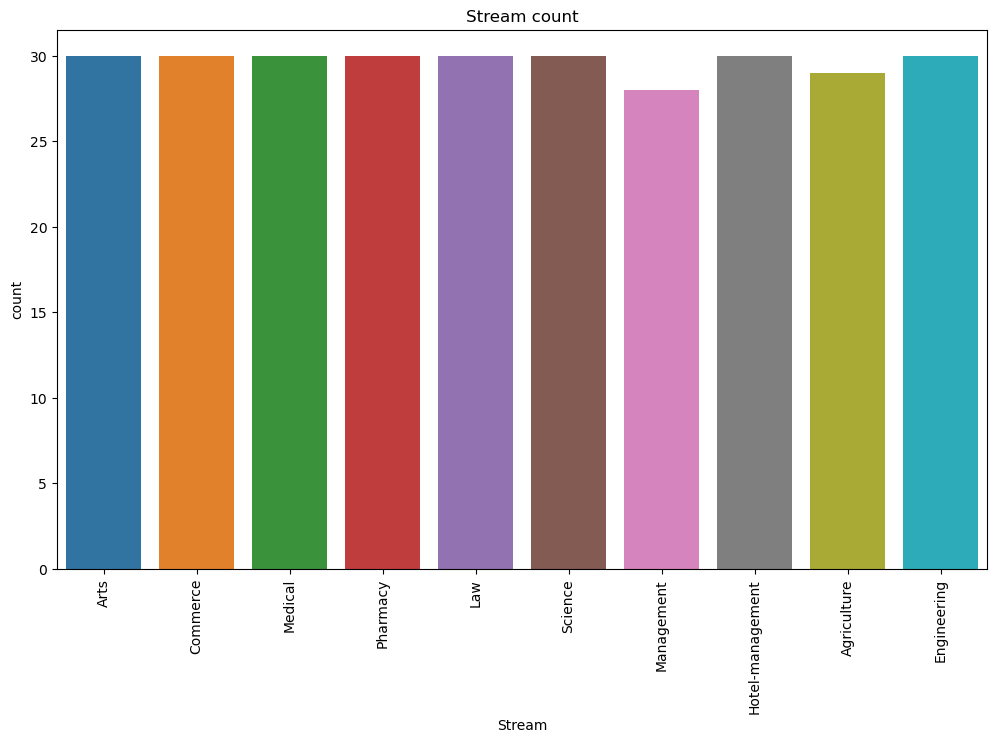

In [28]:
plt.figure(figsize=(12,7))
sns.countplot(data=kerala_data,x='Stream')
plt.title("Stream count")
plt.xticks(rotation=90)
plt.show()

#### Different streams have many options of colleges for choose in Kerala

### Kerala Art Colleges

In [29]:
art_colleges_kerala = kerala_data.query("Stream=='Arts'")
art_colleges_kerala.drop(columns=['Stream'],inplace=True)
art_colleges_kerala

College_Name    UG_fee    PG_fee  \
3171                              Sacred Heart College     6170.0  115600.0   
3172                     Government College, Kasaragod        NaN       NaN   
3173                   St. Albert's College, Ernakulam    18000.0   37500.0   
3177             Government Victoria College, Palakkad     2025.0    3480.0   
3178         Gems Arts and Science College, Malappuram        NaN       NaN   
3179             St Joseph's College Devagiri, Calicut    27200.0   45000.0   
3180       St Teresa's College (Autonomous), Ernakulam     6500.0    5000.0   
3183                     Maharaja's College, Ernakulam     3920.0    5200.0   
3250                         Farook College, Kozhikode     2335.0    3760.0   
3251                Mahatma Gandhi College, Trivandrum     2250.0    3390.0   
3252                             St. Berchmans College     7900.0    8460.0   
3253                                Calicut University     2520.0    3635.0   
3254                      St Thomas' College, Thrissur     2020.0    3380.0   
3255                         Mahatma Gandhi University    20200.0   30000.0   
3256               Rajagiri College of Social Sciences    19453.0   21703.0   
3257           Mar Ivanios College, Thiruvananthapuram     3485.0    3525.0   
3258  Trivandrum University College, Thiruvananthapu...    2695.0    1715.0   
3259                    Indian Institute of Management   950000.0       NaN   
3260       Government Arts College, Thiruvananthapuram        NaN       NaN   
3268            DC School of Management and Technology    48000.0       NaN   
3269                       Nirmalagiri College, Kannur     1960.0    3120.0   
3270          SCMS School of Technology and Management    18000.0       NaN   
3271                      Mar Thoma College, Tiruvalla        NaN       NaN   
3272            SCMS Cochin School of Business, Cochin   375000.0       NaN   
3273  St. Mary's College Sulthan Bathery, Sulthan Ba...   37500.0       NaN   
3274  Bishop Vayalil Memorial Holy Cross College, Ko...   45478.0   38828.0   
3275             Christ College Irinjalakuda, Thrissur   970000.0  871000.0   
3276       AV Abdurahiman Haji Arts & Science College,    29145.0   44130.0   
3277                T.K.M. College of Arts and Science    18000.0   37500.0   
3289                        Newman College, Thodupuzha     2828.0    3793.0   

      Rating  Academic  Accommodation  Faculty  Infrastructure  Placement  \
3171     8.5       8.9            7.5      8.6             8.8        8.0   
3172     8.2       8.3            7.4      9.1             8.7        6.6   
3173     7.1       7.9            6.4      7.7             7.0        6.5   
3177     8.0       8.5            7.4      8.8             7.5        6.3   
3178     7.8       8.2            6.5      8.3             8.3        6.2   
3179     8.4       8.8            7.7      8.7             8.7        7.4   
3180     8.4       8.9            7.4      9.0             8.2        7.7   
3183     7.8       8.4            7.3      8.6             8.2        5.4   
3250     8.1       8.7            8.1      8.5             8.5        5.8   
3251     8.1       8.7            7.5      8.6             8.8        5.9   
3252     8.4       8.6            8.2      8.6             8.6        7.7   
3253     7.0       7.5            6.2      7.5             7.4        5.4   
3254     7.4       8.0            7.0      8.1             7.0        6.6   
3255     7.7       8.0            7.5      8.0             8.0        6.2   
3256     8.5       8.8            8.5      8.8             8.5        8.0   
3257     8.3       8.7            8.1      8.7             8.8        6.6   
3258     8.5       9.2            8.0      8.6             9.0        7.5   
3259     8.9       8.9            8.9      9.1             9.1        9.1   
3260     7.8       9.3            6.3      9.0             8.0        6.5   
3268     7.7       7.4            7.1      7.9       

#### Art colleges ranking by their rating

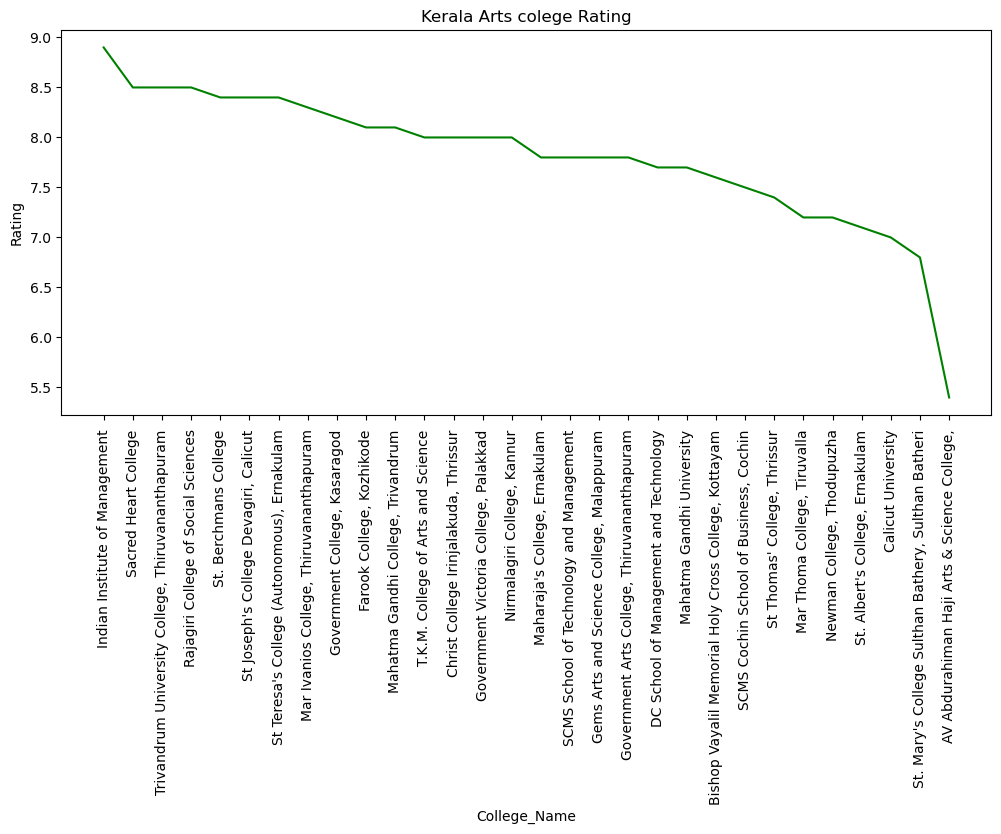

In [30]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Rating',data=art_colleges_kerala.sort_values(by='Rating',ascending=False),color='green')
plt.title("Kerala Arts colege Rating")
plt.show()

#### Based on rating IIM, Sacred Heart College and Trivandrum University College are the best colleges in Kerala

### Academic Rating of Colleges in Kerala

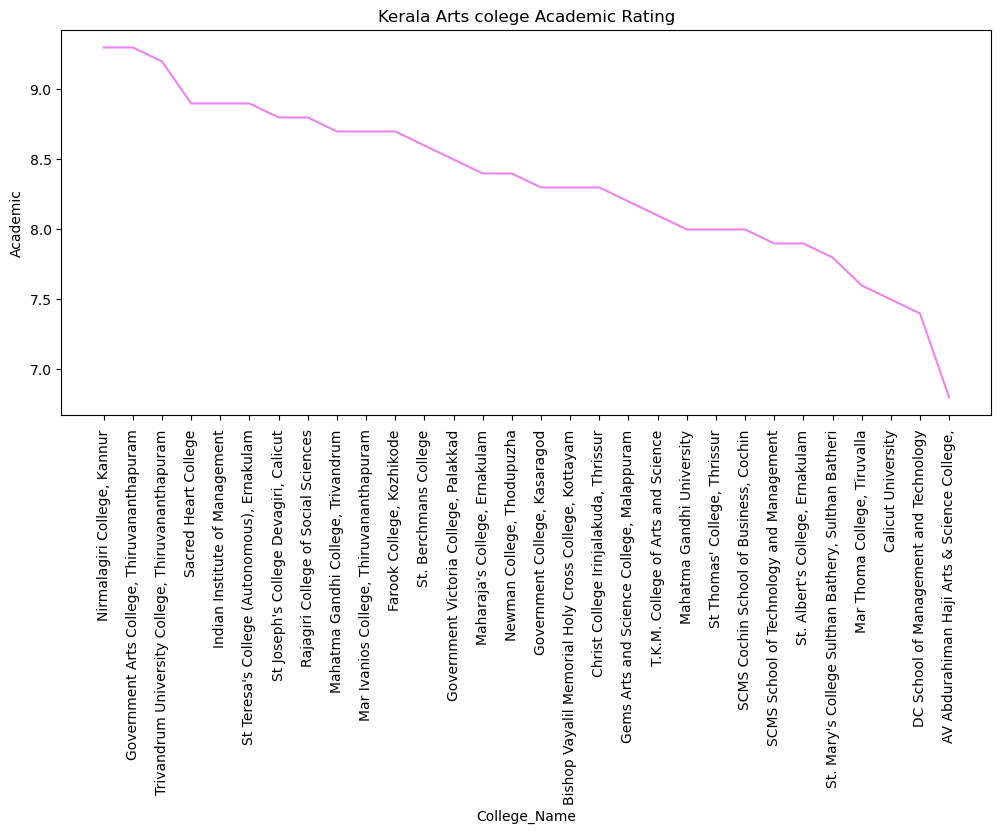

In [31]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Academic',data=art_colleges_kerala.sort_values(by='Academic',ascending=False),color='violet')
plt.title("Kerala Arts colege Academic Rating")
plt.show()

#### Based on Academic rating Nirmalagiri College,Government Arts College and Trivandrum University College are the best

### Accomodation Rating of Kerala Arts Colleges

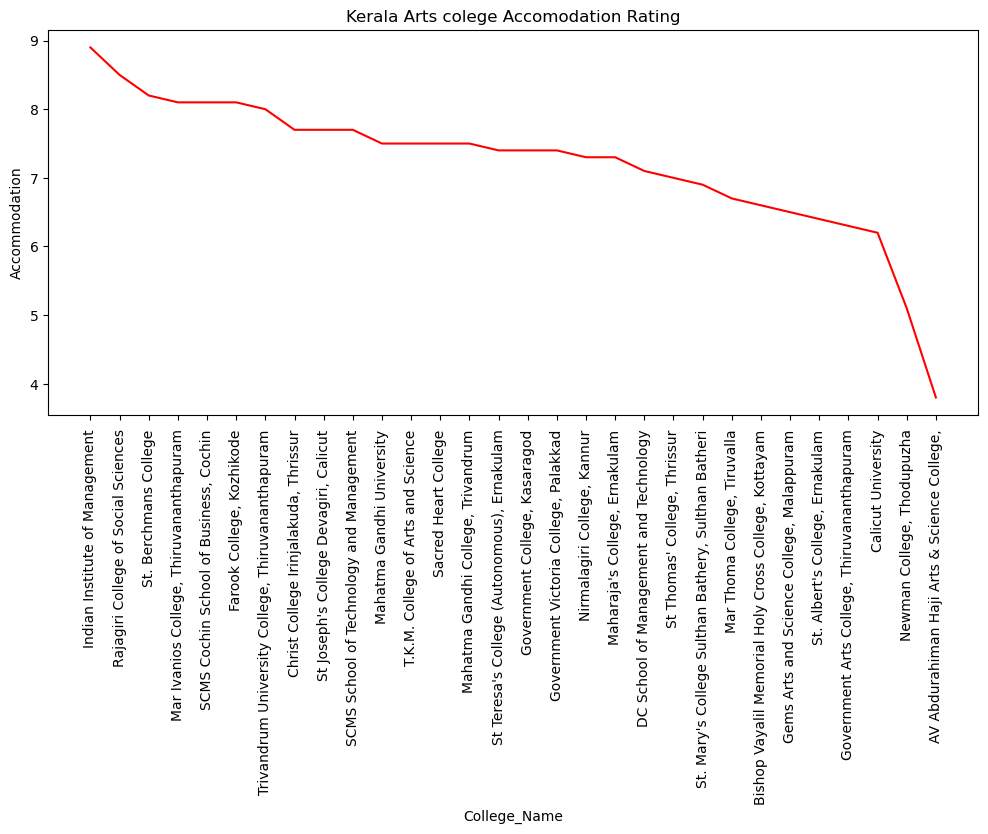

In [32]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Accommodation',data=art_colleges_kerala.sort_values(by='Accommodation',ascending=False),\
             color='red')
plt.title("Kerala Arts colege Accomodation Rating")
plt.show()

#### IIM,Rajagiri College of Social Sciences and St.Berchmans College are having the best accomodation facility

### Infrastructure Rating of Kerala Arts Colleges

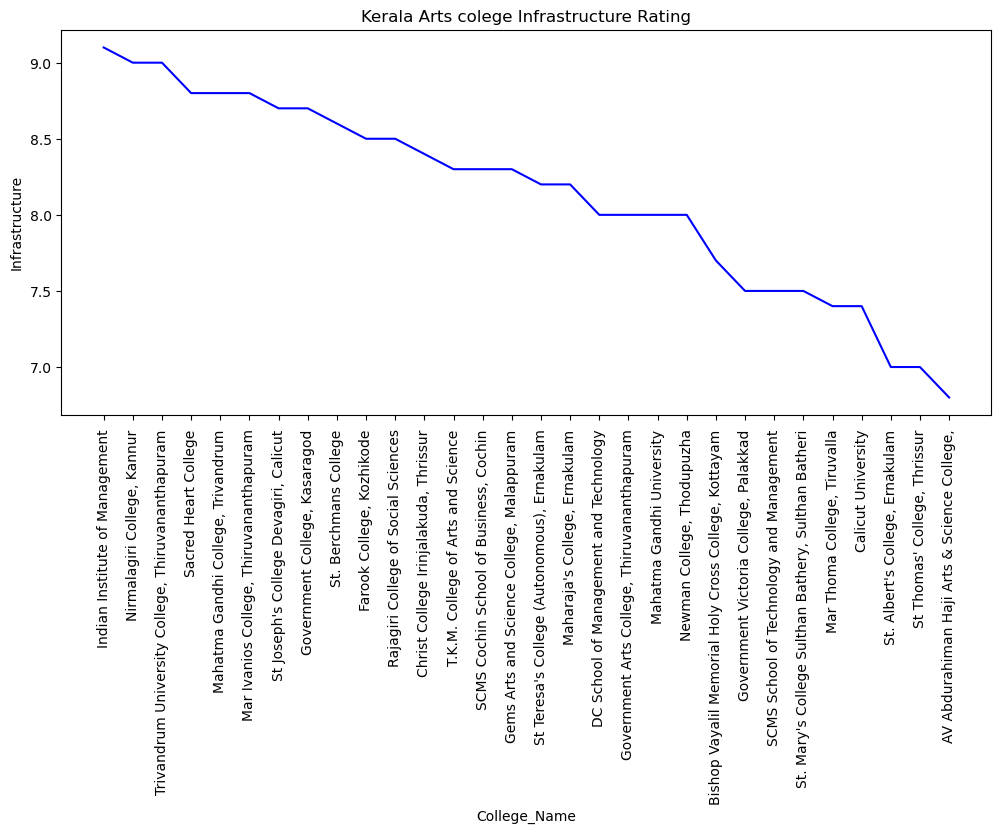

In [33]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Infrastructure',data=art_colleges_kerala.sort_values(by='Infrastructure',ascending=False),\
             color='blue')
plt.title("Kerala Arts colege Infrastructure Rating")
plt.show()

#### Based on Infrastructure rating IIM,Nirmalagiri College,Trivandrum University College are the best 

### Placement Rating of Kerala Arts Colleges

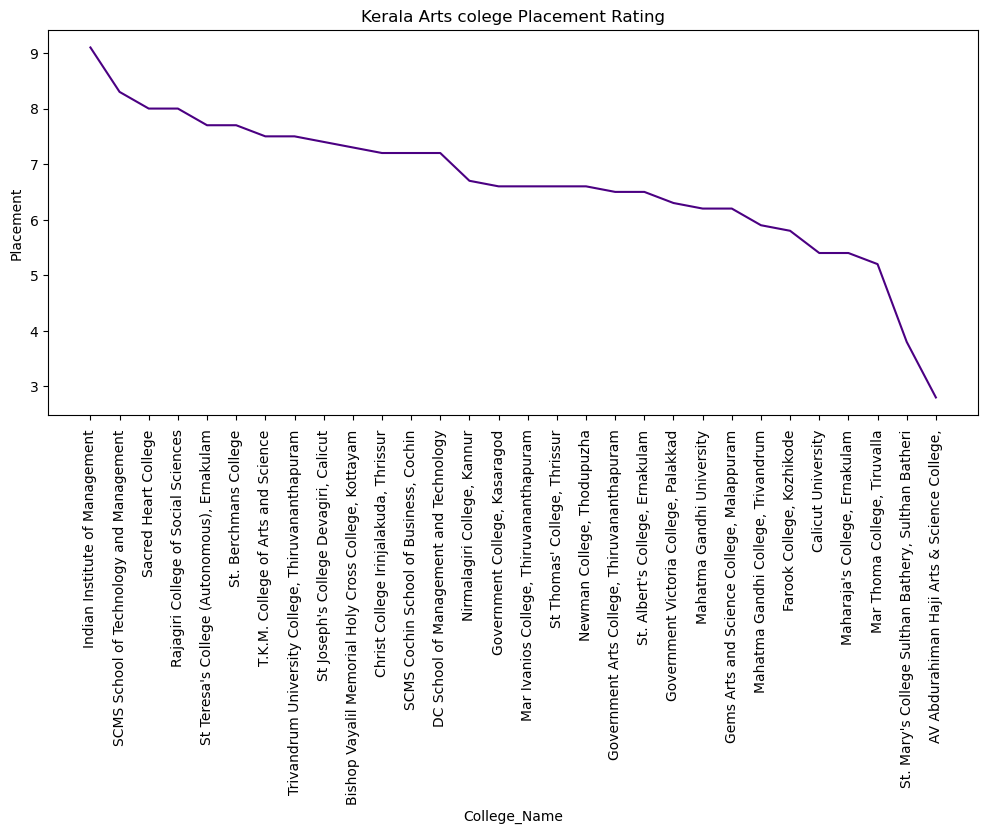

In [34]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Placement',data=art_colleges_kerala.sort_values(by='Placement',ascending=False),\
             color='indigo')
plt.title("Kerala Arts colege Placement Rating")
plt.show()

#### IIM,SCMS School of technology and management,Sacred Heart College providing best placement opportunity

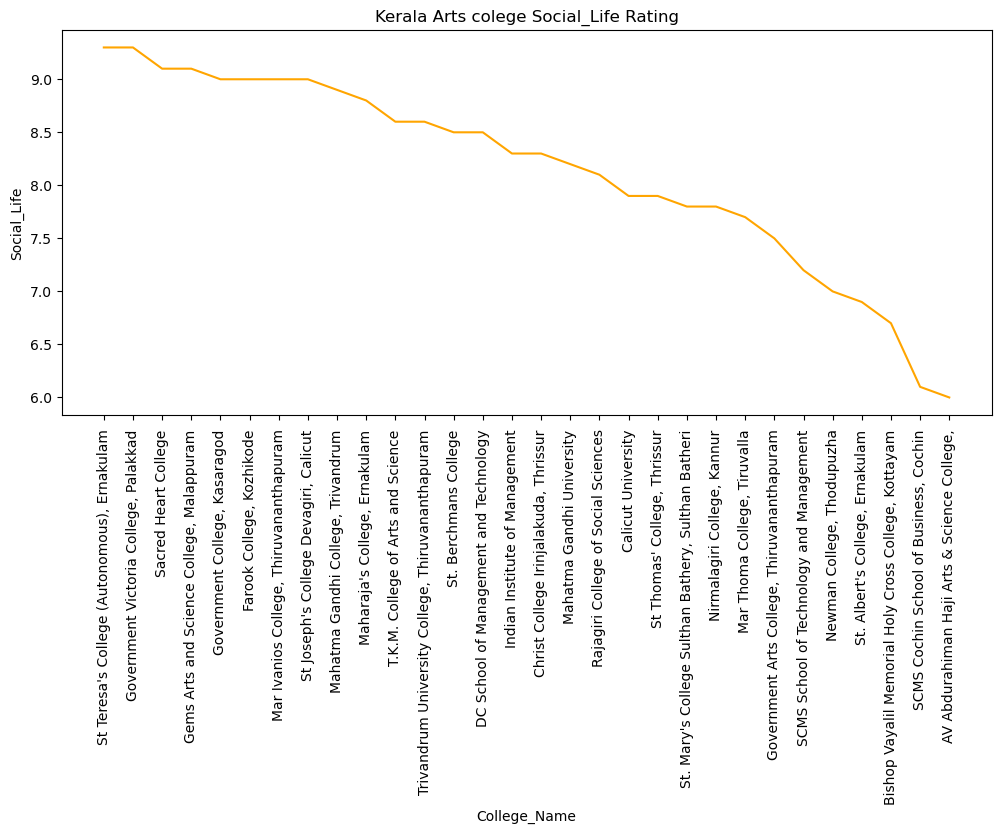

In [35]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Social_Life',data=art_colleges_kerala.sort_values(by='Social_Life',ascending=False),\
             color='orange')
plt.title("Kerala Arts colege Social_Life Rating")
plt.show()

#### St.Teresa's College,Govt Victoria College and Sacred Heart College are having high social life ratings

### Kerala Arts Colleges overall rating

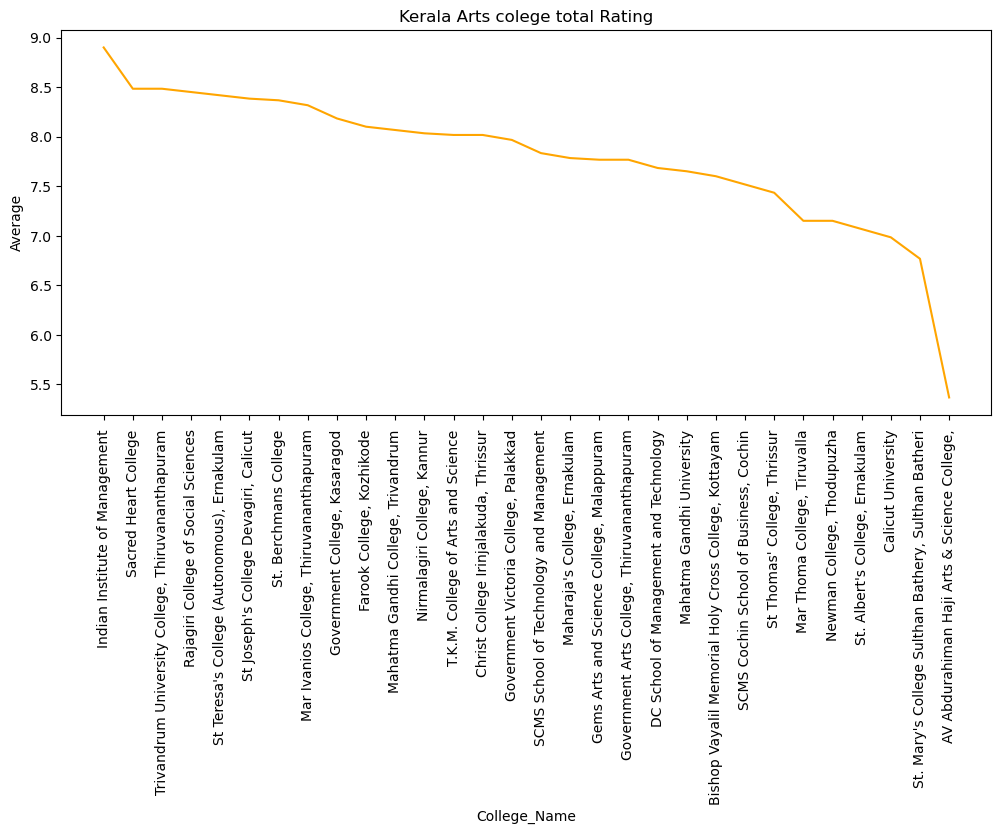

In [36]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Average',data=art_colleges_kerala.sort_values(by='Average',ascending=False),\
             color='orange')
plt.title("Kerala Arts colege total Rating")
plt.show()

#### IIM,Sacred Heart and Trivandrum University College are the best Arts college according to overall rating

### Kerala Management Colleges

In [37]:
management_kerala = kerala_data.query("Stream == 'Management'").drop(columns=['Stream'])
management_kerala

College_Name     UG_fee    PG_fee  \
3293        Don Bosco College Sulthan Bathery, Wayanad     38600.0   45000.0   
3294            Bhavan's Royal Institute of Management    163000.0       NaN   
3295                      Amity Global Business School    161000.0  299000.0   
3296  Mar Athanasios College for Advanced Studies Ti...    96600.0       NaN   
3297                         Amrita School of Business    660000.0       NaN   
3298                             Kochi Business School    320000.0  250000.0   
3299         State Institute of Hospitality Management     30000.0   30000.0   
3300         Naipunnya School of Management, Cherthala     18000.0       NaN   
3301                     IIKM Business School, Calicut     90000.0  385000.0   
3302       Yuvakshetra Institute of Management Studies     96000.0       NaN   
3303  Albertian Institute of Management- [AIM], Cochin    190376.0       NaN   
3304                          Rajagiri Business School   1230500.0  325000.0   
3305                            Jain University, Kochi         NaN       NaN   
3306                     MES College Marampally, Aluva         NaN       NaN   
3307         Girideepam Institute of Advanced Learning     89000.0       NaN   
3308          Holy Grace Academy of Management Studies    128000.0       NaN   
3309            Farook Institute of Management Studies    170000.0       NaN   
3310              Lead College of Management, Palakkad    700000.0       NaN   
3311          SCMS School of Technology and Management    360000.0       NaN   
3312  Nehru College of Engineering and Research Centre     40000.0       NaN   
3313                 Saintgits Institute of Management    227000.0       NaN   
3314  Xavier Institute of Management and Entrepreneu...   400000.0       NaN   
3315                  National Institute of Technology     27405.0   82405.0   
3316            SCMS Cochin School of Business, Cochin    375000.0       NaN   
3323         Berchmans Institute of Management Studies    285000.0       NaN   
3324  Indian School of Business Management and Admin...    14900.0   95900.0   
3399              Rajagiri Centre for Business Studies    700000.0       NaN   
3400                    Indian Institute of Management   2250000.0   45000.0   

      Rating  Academic  Accommodation  Faculty  Infrastructure  Placement  \
3293     7.9       8.3            6.8      8.5             8.3        6.8   
3294     7.7       8.0            7.5      7.4             6.7        7.9   
3295     8.6       9.0            7.5      8.8             8.6        8.6   
3296     8.7       9.3            9.3      8.6             8.8        8.0   
3297     9.4       9.7            9.0      NaN             NaN        NaN   
3298     7.7       7.7            7.3      7.8             7.5        7.9   
3299     7.8       8.5            6.8      8.0             7.3        8.8   
3300     7.5       7.4            6.8      8.1             7.8        7.6   
3301     8.2       7.7            8.0      8.0             8.7        8.7   
3302     6.9       7.7            5.8      6.8             8.0        6.5   
3303     8.0       8.0            6.5      8.8             8.8        7.8   
3304     8.2       8.4            7.4      8.1             8.9        7.5   
3305     8.7       8.6            8.1      9.1             8.7        8.8   
3306     8.8       8.9            8.4      9.1             9.3        8.0   
3307     7.2       8.4            5.4      8.6             7.0        6.6   
3308     8.5       8.7            8.3      8.3             8.5        8.2   
3309     8.9       9.0            9.0      9.0             9.1        8.1   
3310     7.6       7.3            7.6      7.8             7.4        7.9   
3311     7.8       7.9            7.7      8.4             7.5        8.3   
3312     6.7       7.0            6.3      6.7             7.8        5.3   
3313     8.7       8.7            8.0      9.0             8.7        8.8   
3314     9.1       9.2      

### Countplot of Management Colleges rating

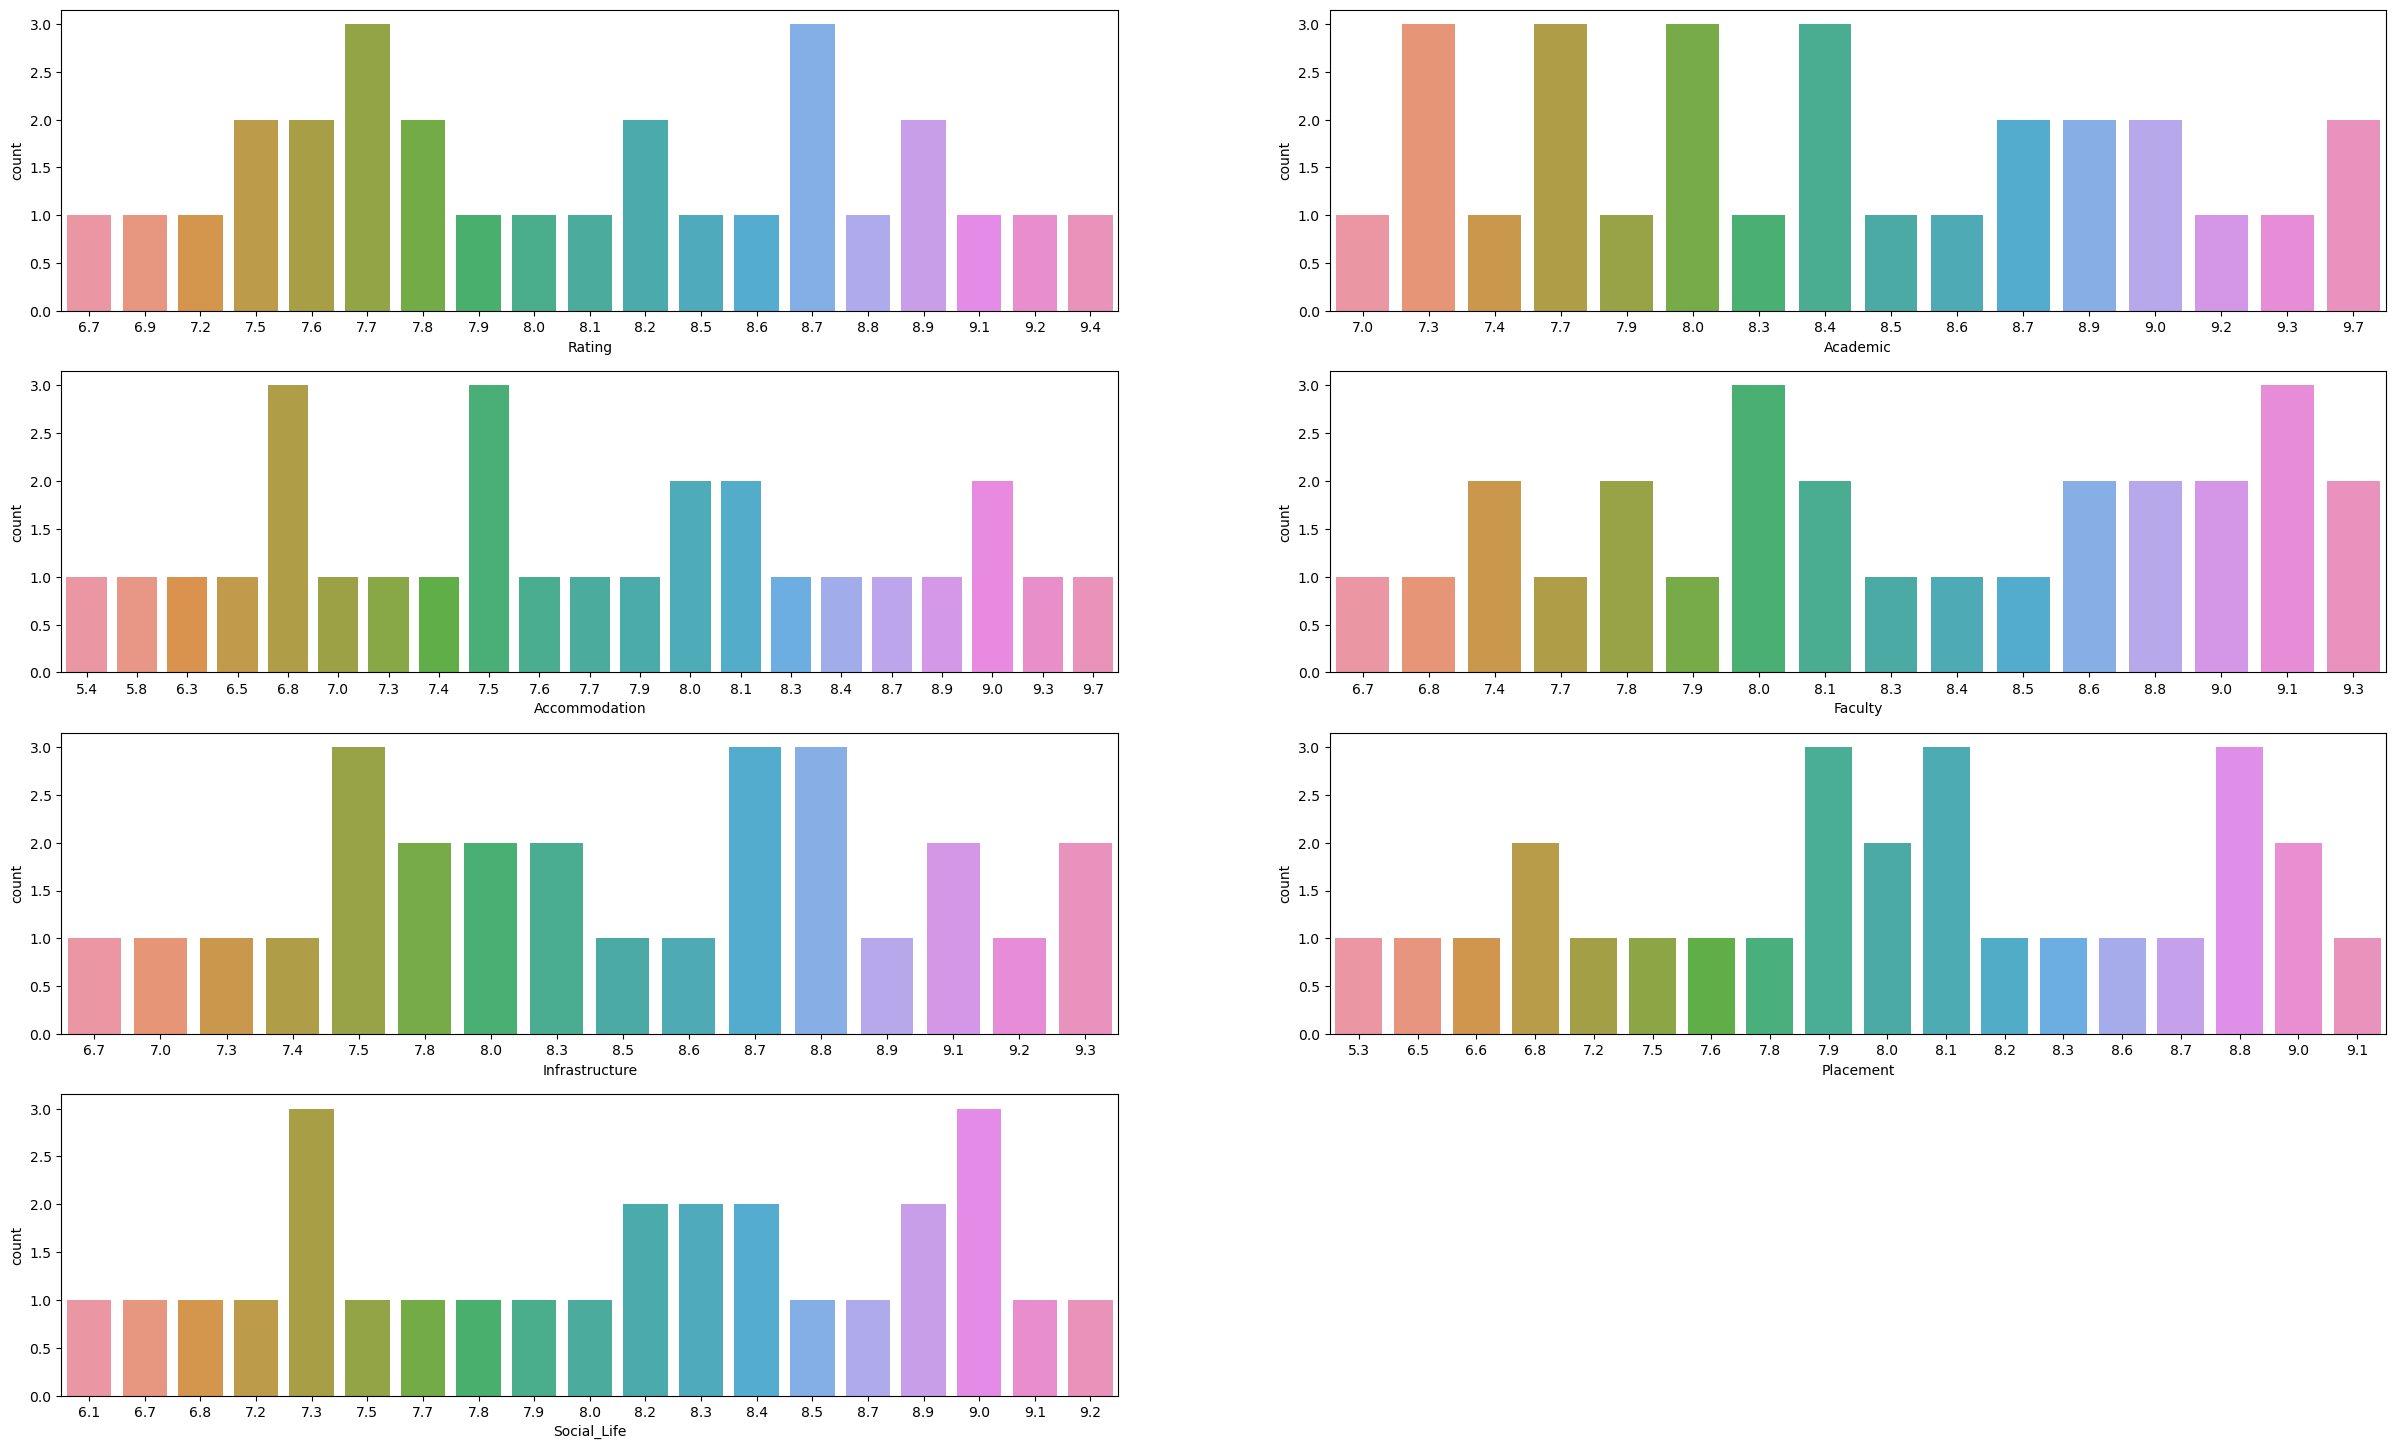

In [38]:
plt.figure(figsize=(30,18))
plt.subplot(4,2,1)
sns.countplot(data=management_kerala.sort_values(by='Rating'),x='Rating')

plt.subplot(4,2,2)
sns.countplot(data=management_kerala.sort_values(by='Academic'),x='Academic')

plt.subplot(4,2,3)
sns.countplot(data=management_kerala.sort_values(by='Accommodation'),x='Accommodation')

plt.subplot(4,2,4)
sns.countplot(data=management_kerala.sort_values(by='Faculty'),x='Faculty')

plt.subplot(4,2,5)
sns.countplot(data=management_kerala.sort_values(by='Infrastructure'),x='Infrastructure')

plt.subplot(4,2,6)
sns.countplot(data=management_kerala.sort_values(by='Placement'),x='Placement')

plt.subplot(4,2,7)
sns.countplot(data=management_kerala.sort_values(by='Social_Life'),x='Social_Life')


plt.show()

### Line plot of Kerala Management colleges

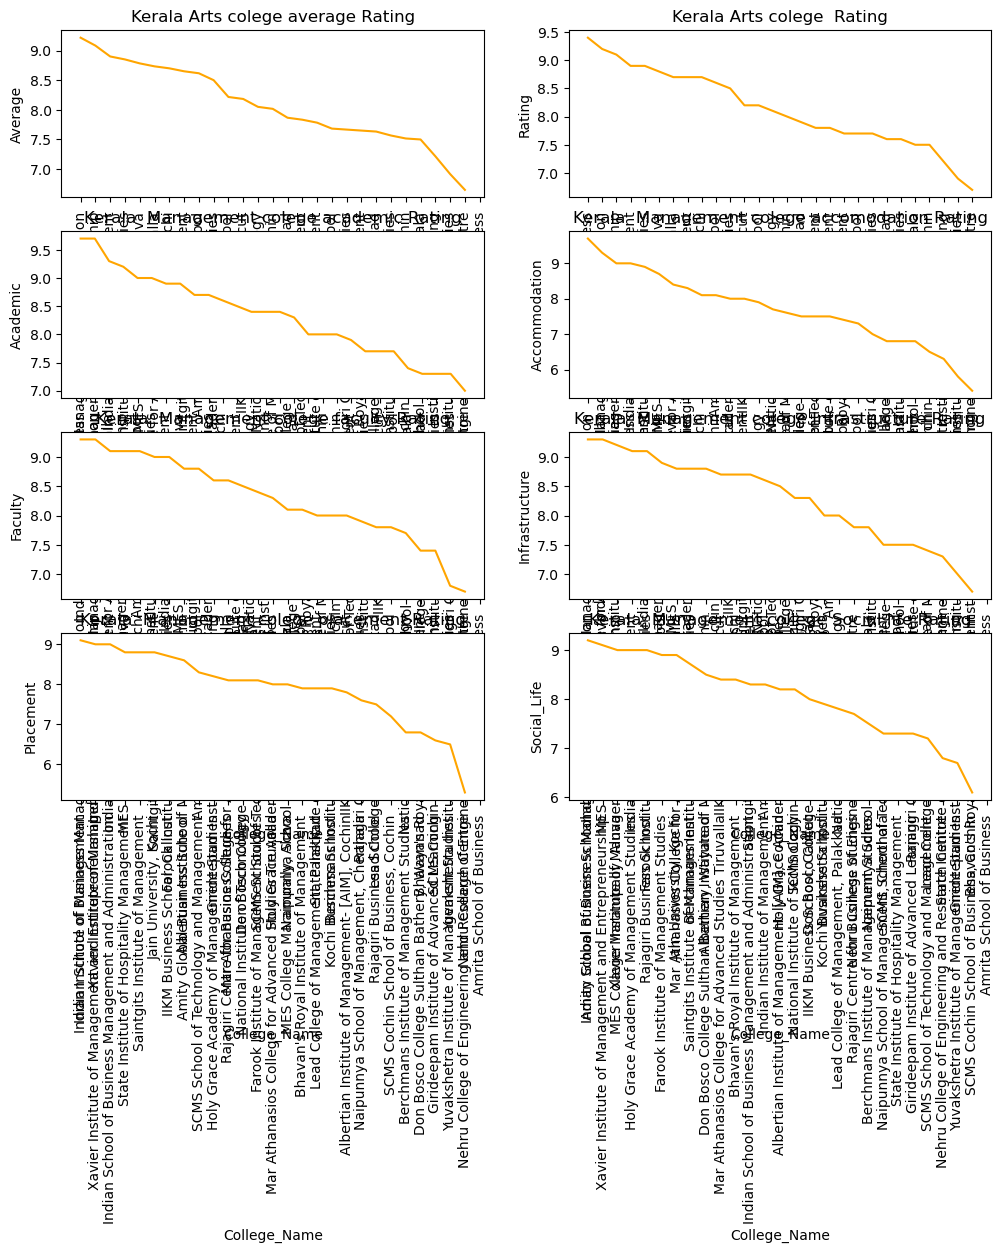

In [39]:
plt.figure(figsize=(12,10))
plt.subplot(4,2,1)
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Average',data=management_kerala.sort_values(by='Average',ascending=False),\
             color='orange')
plt.title("Kerala Arts colege average Rating")

plt.subplot(4,2,2)
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Rating',data=management_kerala.sort_values(by='Rating',ascending=False),\
             color='orange')
plt.title("Kerala Arts colege  Rating")

plt.subplot(4,2,3)
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Academic',data=management_kerala.sort_values(by='Academic',ascending=False),\
             color='orange')
plt.title("Kerala  Management colege academic Rating")

plt.subplot(4,2,4)
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Accommodation',data=management_kerala.sort_values(by='Accommodation',ascending=False),\
             color='orange')
plt.title("Kerala  Management colege accomodation Rating")

plt.subplot(4,2,5)
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Faculty',data=management_kerala.sort_values(by='Faculty',ascending=False),\
             color='orange')
plt.title("Kerala  Management colege faculty Rating")

plt.subplot(4,2,6)
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Infrastructure',data=management_kerala.sort_values(by='Infrastructure',ascending=False),\
             color='orange')
plt.title("Kerala  Management colege Infrastructure Rating")

plt.subplot(4,2,7)
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Placement',data=management_kerala.sort_values(by='Placement',ascending=False),\
             color='orange')
plt.title("Kerala  Management colege placement Rating")

plt.subplot(4,2,8)
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Social_Life',data=management_kerala.sort_values(by='Social_Life',ascending=False),\
             color='orange')
plt.title("Kerala  Management college Social life Rating")

plt.show()

### Line plot of Kerala Management colleges

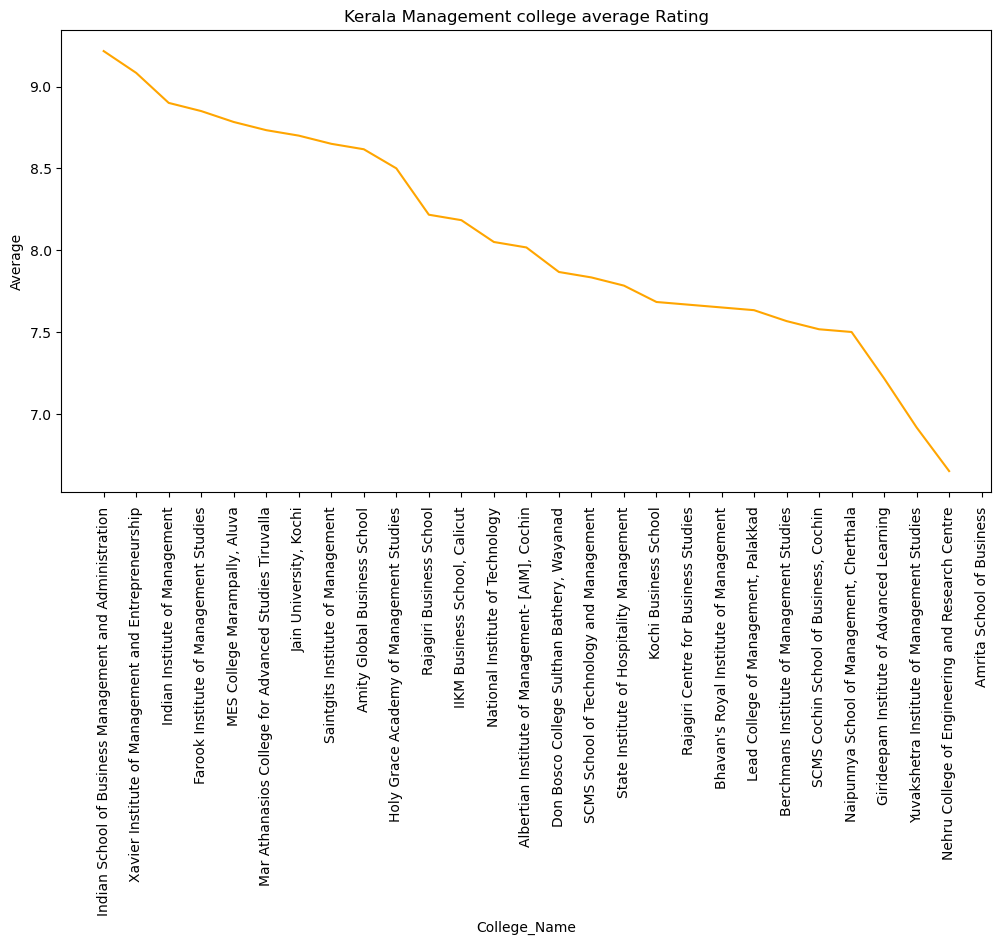

In [40]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Average',data=management_kerala.sort_values(by='Average',ascending=False),\
             color='orange')
plt.title("Kerala Management college average Rating")
plt.show()

#### Best management College in Kerala based on overall rating is Indian School of Business Management and administration

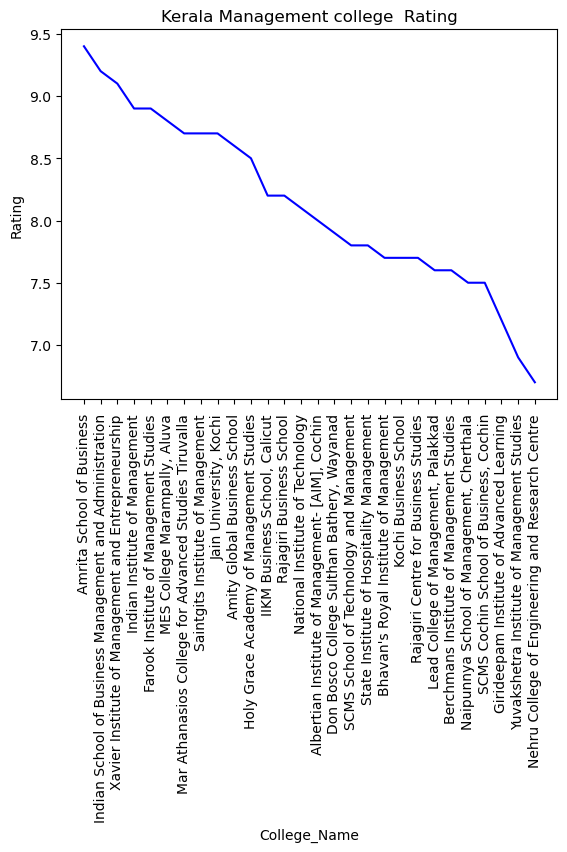

In [41]:
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Rating',data=management_kerala.sort_values(by='Rating',ascending=False),\
             color='blue')
plt.title("Kerala Management college  Rating")
plt.show()

#### Amrita School of Business got high rating

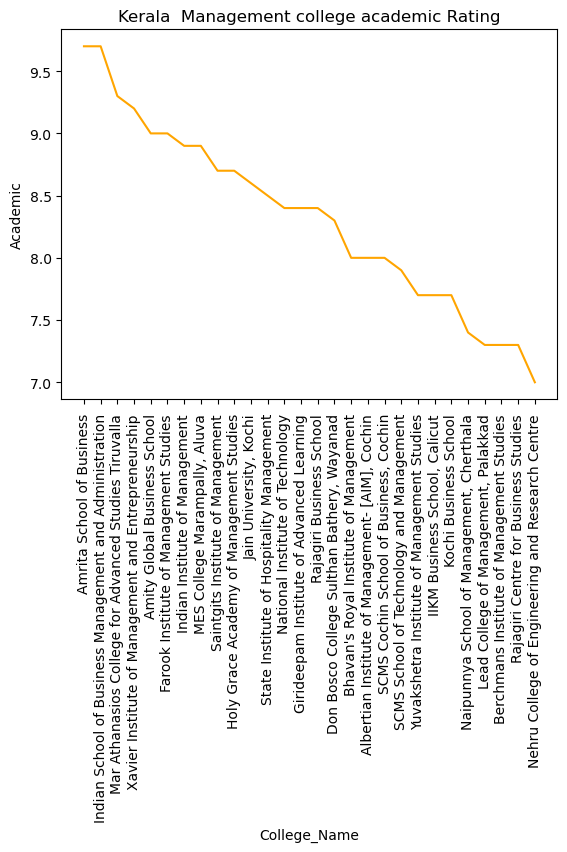

In [42]:
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Academic',data=management_kerala.sort_values(by='Academic',ascending=False),\
             color='orange')
plt.title("Kerala  Management college academic Rating")
plt.show()

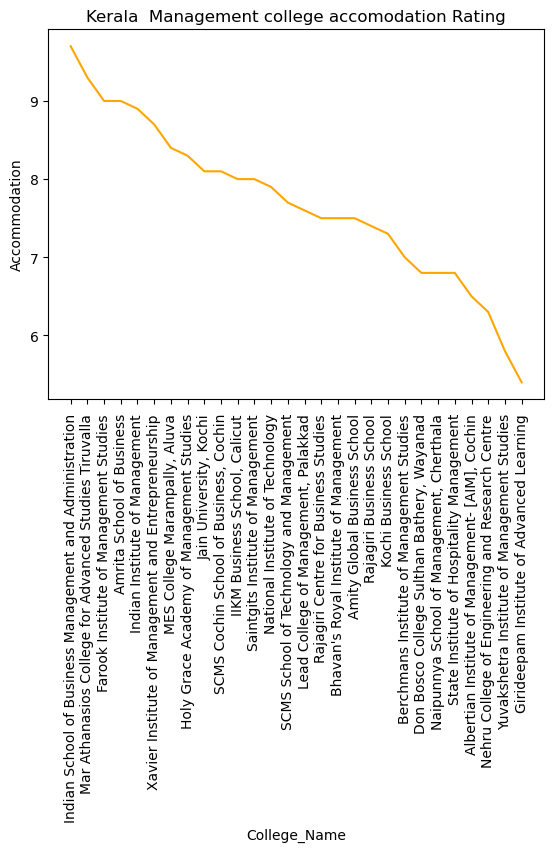

In [43]:
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Accommodation',data=management_kerala.sort_values(by='Accommodation',ascending=False),\
             color='orange')
plt.title("Kerala  Management college accomodation Rating")
plt.show()

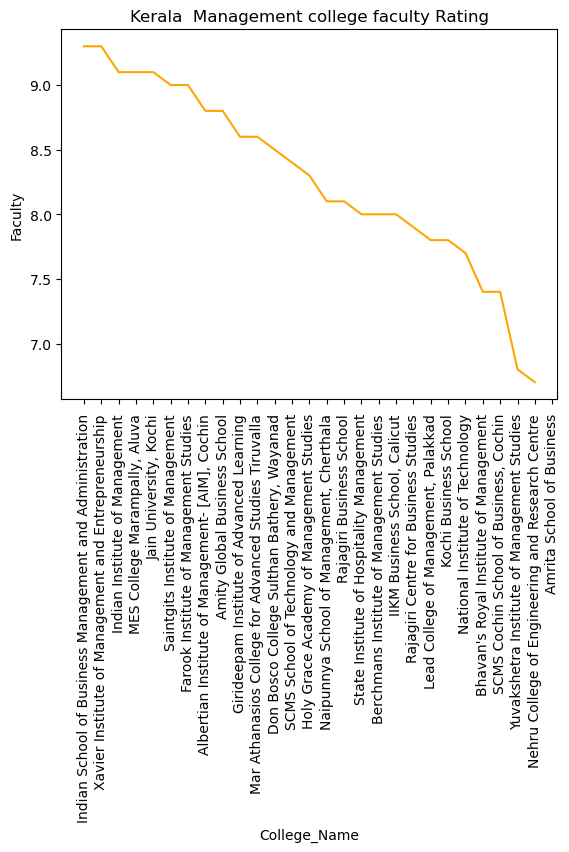

In [44]:
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Faculty',data=management_kerala.sort_values(by='Faculty',ascending=False),\
             color='orange')
plt.title("Kerala  Management college faculty Rating")
plt.show()

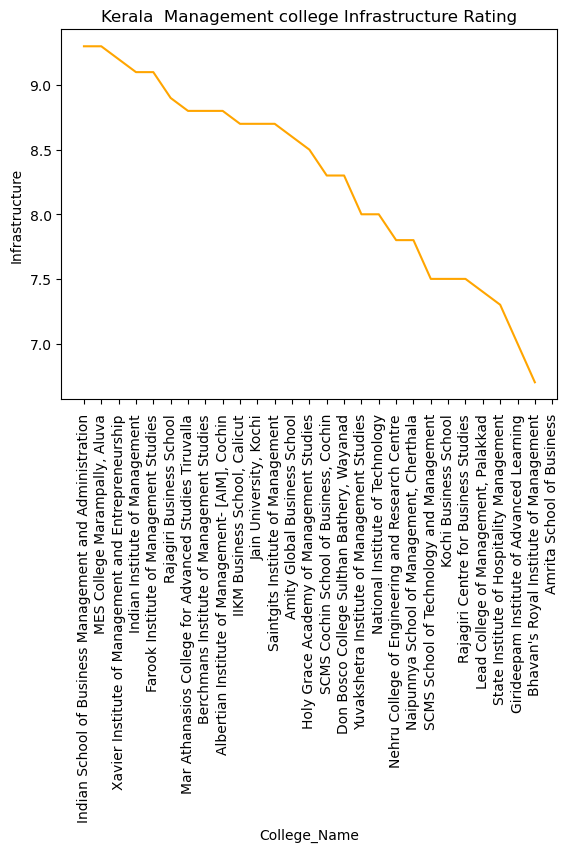

In [45]:
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Infrastructure',data=management_kerala.sort_values(by='Infrastructure',ascending=False),\
             color='orange')
plt.title("Kerala  Management college Infrastructure Rating")
plt.show()

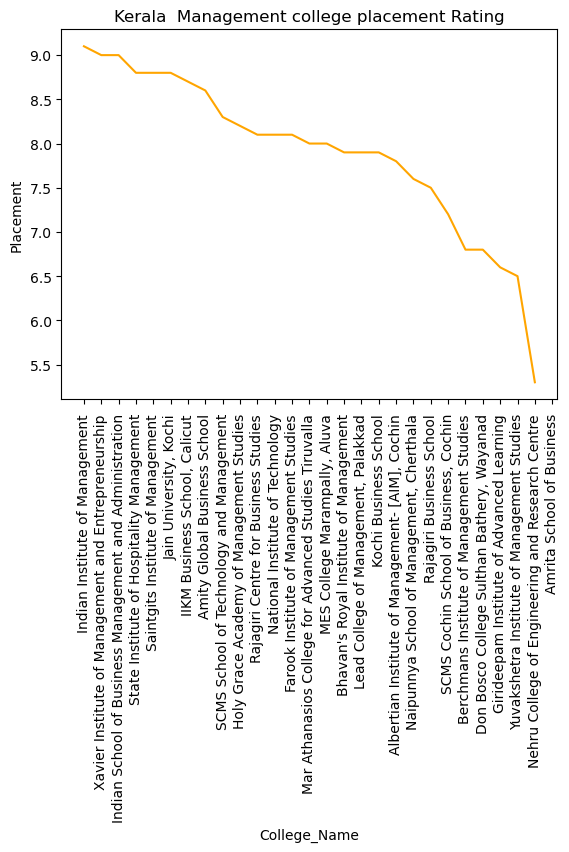

In [46]:
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Placement',data=management_kerala.sort_values(by='Placement',ascending=False),\
             color='orange')
plt.title("Kerala  Management college placement Rating")
plt.show()

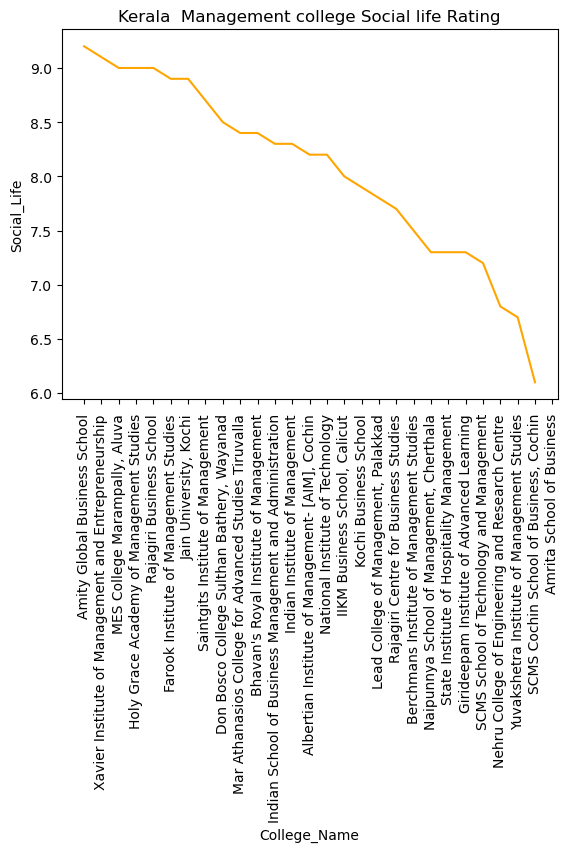

In [47]:
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Social_Life',data=management_kerala.sort_values(by='Social_Life',ascending=False),\
             color='orange')
plt.title("Kerala  Management college Social life Rating")
plt.show()

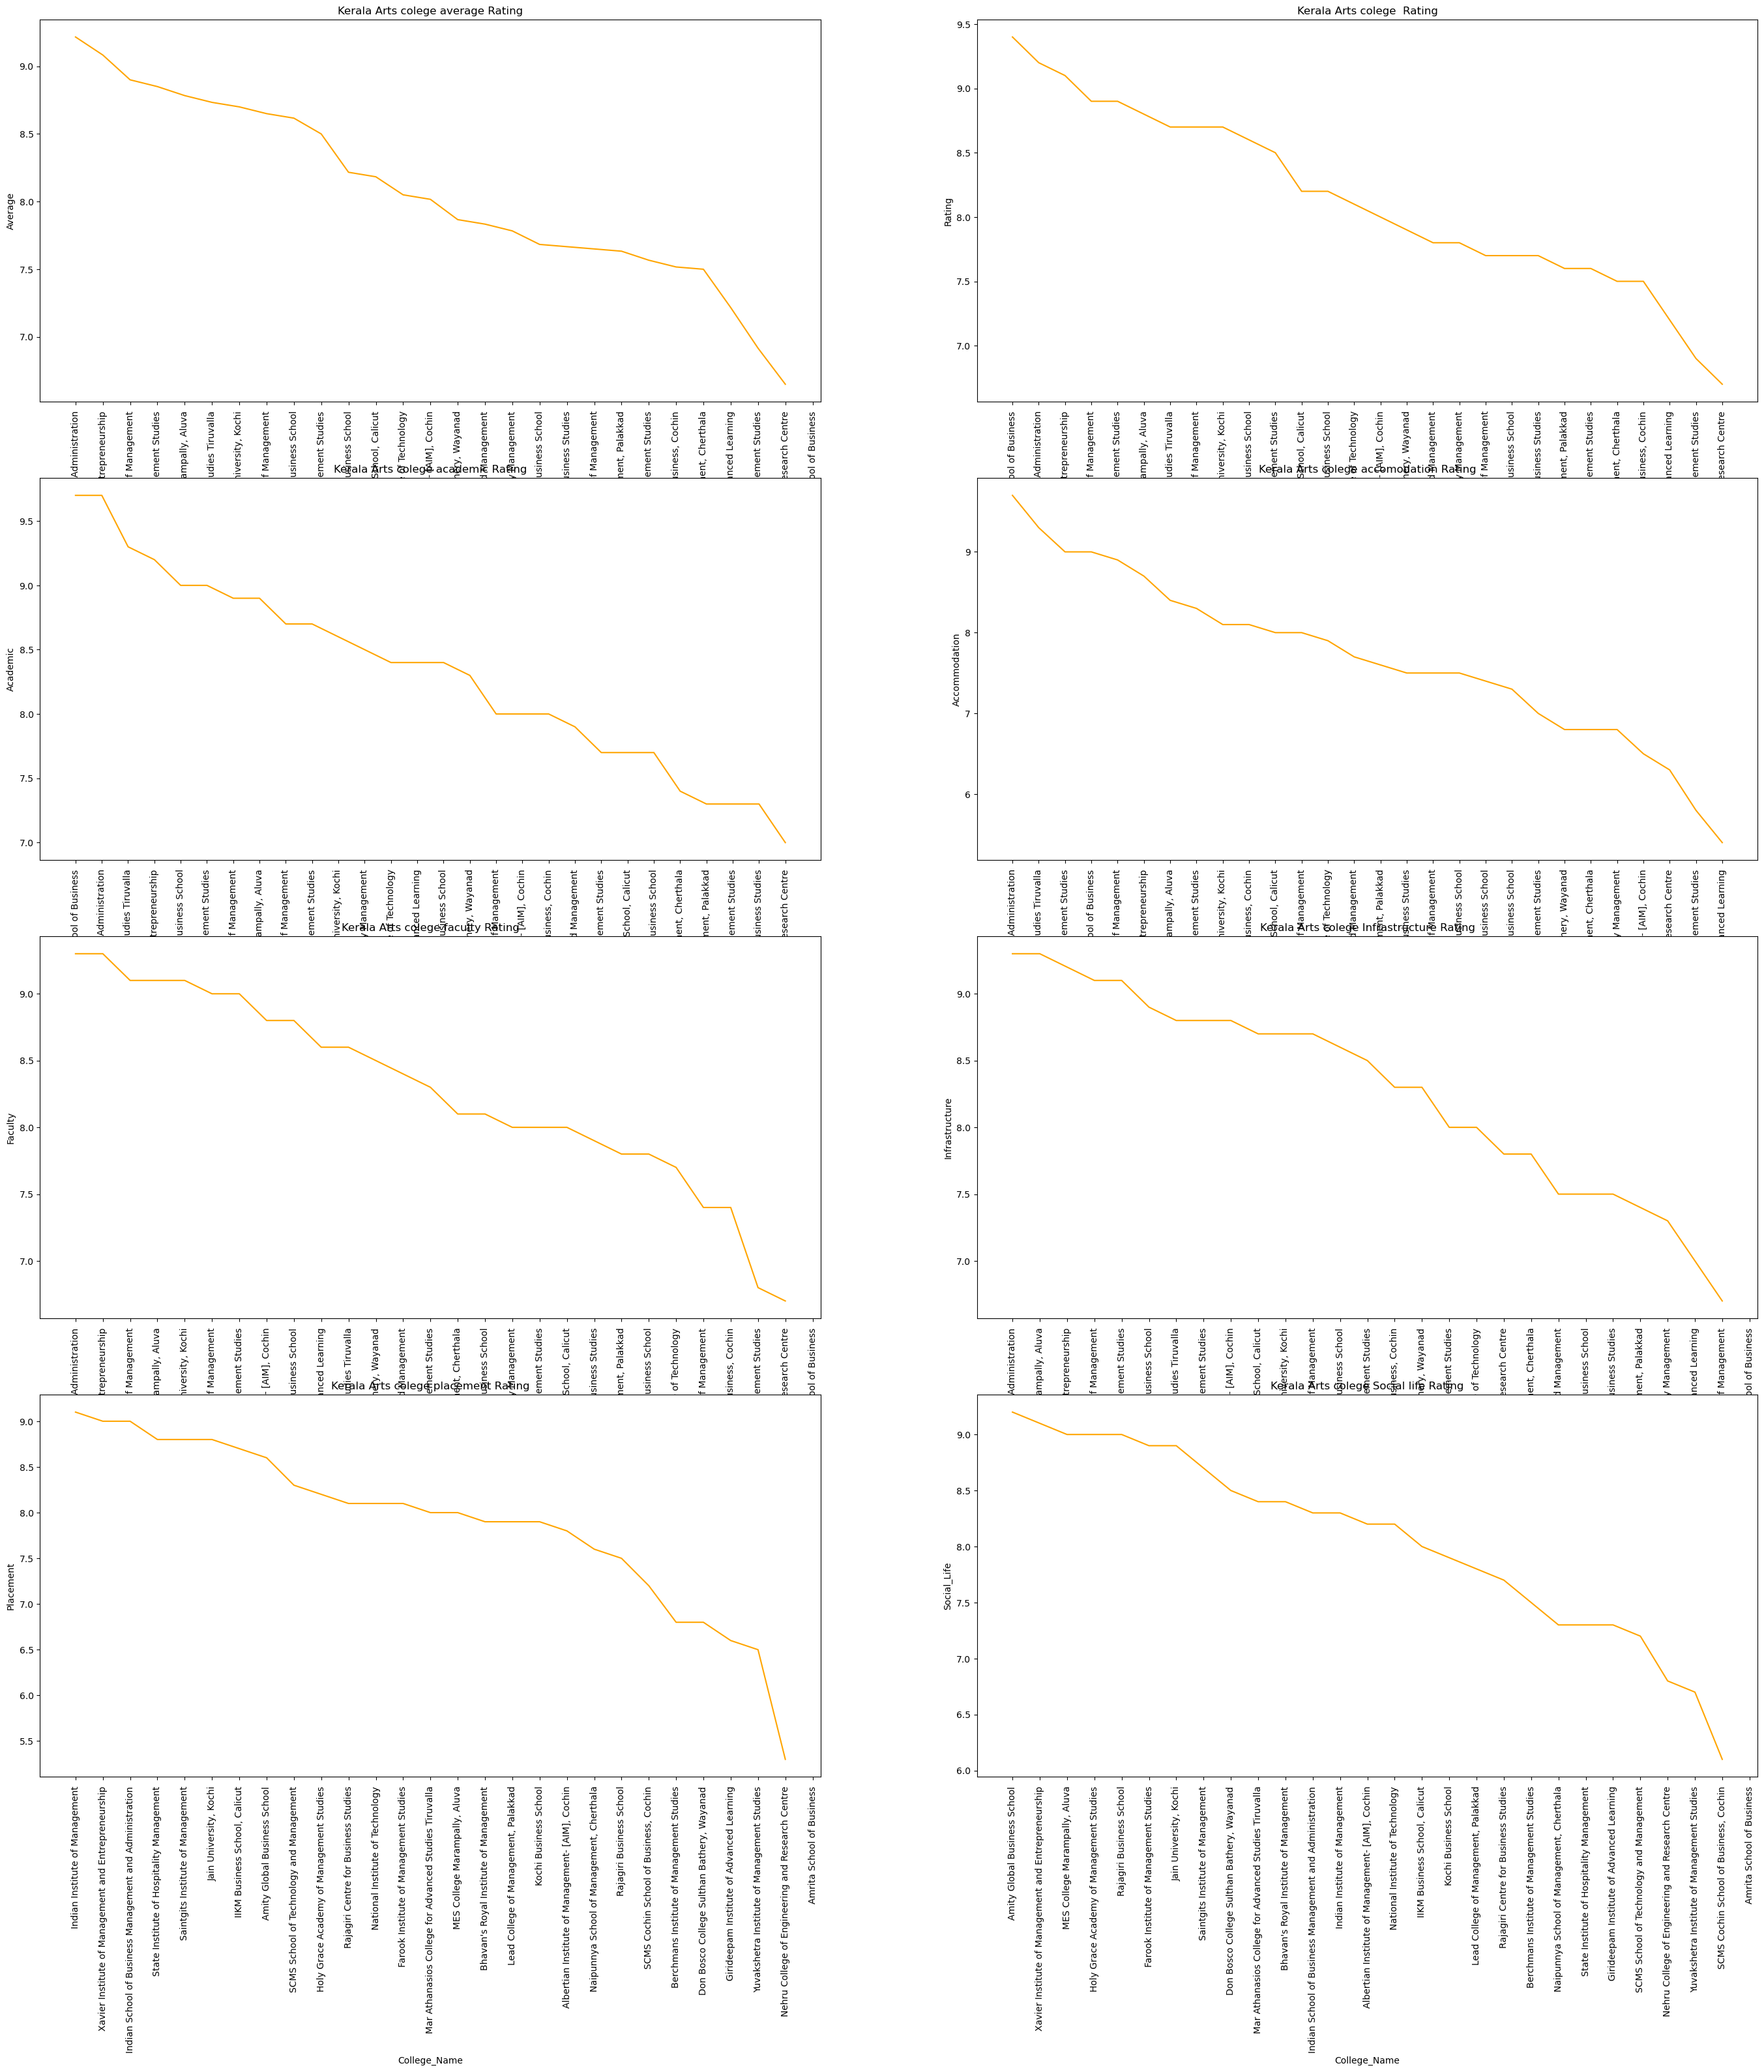

In [48]:
plt.figure(figsize=(34,35))
plt.subplot(4,2,1)
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Average',data=management_kerala.sort_values(by='Average',ascending=False),\
             color='orange')
plt.title("Kerala Arts colege average Rating")

plt.subplot(4,2,2)
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Rating',data=management_kerala.sort_values(by='Rating',ascending=False),\
             color='orange')
plt.title("Kerala Arts colege  Rating")

plt.subplot(4,2,3)
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Academic',data=management_kerala.sort_values(by='Academic',ascending=False),\
             color='orange')
plt.title("Kerala Arts colege academic Rating")

plt.subplot(4,2,4)
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Accommodation',data=management_kerala.sort_values(by='Accommodation',ascending=False),\
             color='orange')
plt.title("Kerala Arts colege accomodation Rating")

plt.subplot(4,2,5)
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Faculty',data=management_kerala.sort_values(by='Faculty',ascending=False),\
             color='orange')
plt.title("Kerala Arts colege faculty Rating")

plt.subplot(4,2,6)
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Infrastructure',data=management_kerala.sort_values(by='Infrastructure',ascending=False),\
             color='orange')
plt.title("Kerala Arts colege Infrastructure Rating")

plt.subplot(4,2,7)
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Placement',data=management_kerala.sort_values(by='Placement',ascending=False),\
             color='orange')
plt.title("Kerala Arts colege placement Rating")

plt.subplot(4,2,8)
plt.xticks(rotation=90)
sns.lineplot(x='College_Name',y='Social_Life',data=management_kerala.sort_values(by='Social_Life',ascending=False),\
             color='orange')
plt.title("Kerala Arts colege Social life Rating")

plt.show()

### Kerala Engineering colleges

In [49]:
Eng_kerala = kerala_data.query("Stream=='Engineering'").drop(columns=['Stream'])
Eng_kerala

College_Name    UG_fee    PG_fee  \
3362  Baselios Thomas I Catholicose College of Engin...   85000.0       NaN   
3363  Cochin University of Science and Technology, S...   86040.0   52730.0   
3364                College of Engineering, Trivandrum   200000.0   15725.0   
3365  Indian Institute of Space Science and Technology   142400.0   87400.0   
3366                  National Institute of Technology    53797.0   27405.0   
3385       Cochin University of Science and Technology    46600.0   19290.0   
3396          APJ Abdul Kalam Technological University    29000.0       NaN   
3406        Trinity College of Engineering, Trivendrum    75000.0       NaN   
3407                   Sahrdaya College of Engineering    35000.0   77000.0   
3408       Rajagiri School of Engineering & Technology    87000.0   77000.0   
3409      MEA Engineering College- [MEAEC], Malappuram    75000.0   60000.0   
3410            KMCT College of Engineering, Kozhikode    75000.0       NaN   
3411         College of Engineering Thalassery, Kannur    38250.0       NaN   
3412  St. Thomas College of Engineering and Technolo...   58150.0       NaN   
3413             Mar Athanasius College of Engineering     8225.0   21950.0   
3414       Federal Institute of Science and Technology    75100.0   87050.0   
3415  Indian Institute of Information Technology [II...  198950.0       NaN   
3416                    Government Engineering College    22150.0   10970.0   
3417  National Institute of Electronics & Informatio...   60000.0  138500.0   
3418                        TKM College of Engineering     8410.0   16290.0   
3419                Amal Jyothi College of Engineering   100000.0   96000.0   
3420                    Indian Institute of Technology    35850.0  222350.0   
3421                  Hindustan College of Engineering    50000.0       NaN   
3422        Saintgits College of Engineering, Kottayam    75000.0  171900.0   
3423              Rajiv Gandhi Institute of Technology    22000.0   22000.0   
3424        Mangalam College of Engineering Ettumanoor    75000.0  300000.0   
3425                        NSS College of Engineering     8739.0   11065.0   
3426       Sree Chitra Thirunal College of Engineering    62668.0   75041.0   
3427              Thejus Engineering College, Thrissur    88400.0  160000.0   
3428                        Marian Engineering College    96050.0   61300.0   

      Rating  Academic  Accommodation  Faculty  Infrastructure  Placement  \
3362     7.4       7.5            8.0      8.5             7.0        6.5   
3363     8.3       8.5            7.8      8.3             8.2        8.2   
3364     8.4       8.6            7.8      8.0             8.5        8.4   
3365     8.1       8.9            7.8      8.5             8.6        7.7   
3366     8.1       8.4            7.9      7.7             8.0        8.1   
3385     7.9       8.4            7.5      7.8             7.8        7.7   
3396     7.8       8.1            6.9      8.2             8.1        7.5   
3406     6.8       7.6            6.4      7.3             6.7        6.1   
3407     7.1       7.5            6.8      7.3             8.1        6.6   
3408     8.2       8.4            8.0      8.2             9.0        8.6   
3409     8.2       8.1            8.6      8.3             8.7        6.6   
3410     7.3       7.5            7.7      7.2             7.8        5.7   
3411     7.2       7.8            6.3      7.8             7.5        6.6   
3412     8.3       8.4            7.9      8.6             8.5        7.8   
3413     8.4       8.5            8.2      8.2             8.8        8.1   
3414     8.1       8.3            7.5      8.3             8.8        8.0   
3415     8.3       8.5            8.1      8.5             8.1        8.6   
3416     8.5       8.5            8.0      8.4             8.7        8.3   
3417     8.4       8.7            6.7      8.9             8.7        8.8   
3418     8.4       8.8            8.2      8.4       

In [50]:
science_kerala = kerala_data.query("Stream=='Science'").drop(columns=['Stream'])
science_kerala

College_Name    UG_fee    PG_fee  \
3292       St Teresa's College (Autonomous), Ernakulam     3500.0    7000.0   
3431           Mar Ivanios College, Thiruvananthapuram     4065.0    4725.0   
3432                Mahatma Gandhi College, Trivandrum     2800.0   84376.0   
3433       Government Arts College, Thiruvananthapuram        NaN       NaN   
3434                         Farook College, Kozhikode     3190.0    5020.0   
3435                T.K.M. College of Arts and Science    22500.0   37500.0   
3436             St Joseph's College Devagiri, Calicut    71300.0   38000.0   
3437              Fatima Mata National College, Kollam     3805.0    5090.0   
3438             Christ College Irinjalakuda, Thrissur   871000.0  970000.0   
3439                      Mar Thoma College, Tiruvalla        NaN       NaN   
3440                       Nirmalagiri College, Kannur     2545.0    4380.0   
3441                  National Institute of Technology    27405.0   27405.0   
3443  Indian Institute of Space Science and Technology    21400.0   87400.0   
3444                         Mahatma Gandhi University     3280.0   20200.0   
3445                                Calicut University     2520.0    5525.0   
3446  Oriental School of Hotel Management Lakkidi, W...   97800.0       NaN   
3447  Bishop Vayalil Memorial Holy Cross College, Ko...   18470.0   41828.0   
3448  St. Mary's College Sulthan Bathery, Sulthan Ba...   45000.0       NaN   
3449                     Government College, Kasaragod        NaN       NaN   
3450  Cochin University of Science and Technology, S...    8595.0       NaN   
3451          SCMS School of Technology and Management    45000.0       NaN   
3452  Kerala Veterinary and Animal Sciences University   152350.0  119100.0   
3453                             St. Berchmans College     9550.0  142000.0   
3454                   St. Albert's College, Ernakulam    37500.0   45000.0   
3455                        Newman College, Thodupuzha     3265.0    4993.0   
3456  Government College for Women, Thiruvananthapuram        NaN       NaN   
3462                      St Thomas' College, Thrissur     2570.0    3980.0   
3464  Trivandrum University College, Thiruvananthapu...    1555.0    3595.0   
3465                              Sacred Heart College     6970.0   10200.0   
3466               Rajagiri College of Social Sciences    23853.0   46803.0   

      Rating  Academic  Accommodation  Faculty  Infrastructure  Placement  \
3292     8.4       8.9            7.4      9.0             8.2        7.7   
3431     8.3       8.7            8.1      8.7             8.8        6.6   
3432     8.1       8.7            7.5      8.6             8.8        5.9   
3433     7.8       9.3            6.3      9.0             8.0        6.5   
3434     8.1       8.7            8.1      8.5             8.5        5.8   
3435     8.0       8.1            7.5      8.1             8.3        7.5   
3436     8.4       8.8            7.7      8.7             8.7        7.4   
3437     8.2       8.7            6.3      8.7             9.3        6.9   
3438     8.0       8.3            7.7      8.2             8.4        7.2   
3439     7.2       7.6            6.7      8.3             7.4        5.2   
3440     8.0       9.3            7.3      8.1             9.0        6.7   
3441     8.1       8.4            7.9      7.7             8.0        8.1   
3443     8.1       8.9            7.8      8.5             8.6        7.7   
3444     7.7       8.0            7.5      8.0             8.0        6.2   
3445     7.0       7.5            6.2      7.5             7.4        5.4   
3446     7.5       8.3            7.0      7.6             7.1        8.1   
3447     7.6       8.3            6.6      9.0             7.7        7.3   
3448     6.8       7.8            6.9      6.8             7.5        3.8   
3449     8.2       8.3            7.4      9.1             8.7        6.6   
3450     8.3       8.5            7.8      8.3       

In [51]:
commerce_kerala = kerala_data.query("Stream=='Commerce'").drop(columns=['Stream'])
commerce_kerala

College_Name    UG_fee    PG_fee  \
3174              Jai Bharath Arts and Science College        NaN       NaN   
3175         Gems Arts and Science College, Malappuram        NaN       NaN   
3176       Cochin University of Science and Technology     7915.0       NaN   
3181       AV Abdurahiman Haji Arts & Science College,    24645.0   44130.0   
3182                T.K.M. College of Arts and Science    18000.0   37500.0   
3210                Amrita School of Arts and Sciences    86500.0   84900.0   
3211                        Newman College, Thodupuzha    23903.0    3793.0   
3212                         Farook College, Kozhikode     2290.0    3760.0   
3213                Mahatma Gandhi College, Trivandrum     2250.0    3390.0   
3214       St Teresa's College (Autonomous), Ernakulam     5000.0   37500.0   
3215                             St. Berchmans College     7900.0       NaN   
3216                                Calicut University     7130.0   35500.0   
3217                   St. Albert's College, Ernakulam    22500.0   37500.0   
3218                      St Thomas' College, Thrissur     2020.0    3380.0   
3219                         Mahatma Gandhi University    19720.0   20200.0   
3220               Rajagiri College of Social Sciences    23853.0       NaN   
3221           Mar Ivanios College, Thiruvananthapuram    24935.0    3525.0   
3222                              Sacred Heart College    34350.0    8100.0   
3223  Oriental School of Hotel Management Lakkidi, W...   44300.0       NaN   
3224             Christ College Irinjalakuda, Thrissur   871000.0  970000.0   
3225  Bishop Vayalil Memorial Holy Cross College, Ko...   32478.0   41828.0   
3226  St. Mary's College Sulthan Bathery, Sulthan Ba...   18000.0   37500.0   
3227                     Government College, Kasaragod        NaN       NaN   
3228                      Mar Thoma College, Tiruvalla        NaN       NaN   
3229          SCMS School of Technology and Management    22500.0       NaN   
3230                       Nirmalagiri College, Kannur     1960.0       NaN   
3231            DC School of Management and Technology    18000.0       NaN   
3232                     MES College Marampally, Aluva        NaN       NaN   
3233             Government Victoria College, Palakkad     2025.0    3480.0   
3287             St Joseph's College Devagiri, Calicut    34000.0       NaN   

      Rating  Academic  Accommodation  Faculty  Infrastructure  Placement  \
3174     6.4       6.6            6.6      6.7             6.2        6.0   
3175     7.8       8.2            6.5      8.3             8.3        6.2   
3176     7.9       8.4            7.5      7.8             7.8        7.7   
3181     5.4       6.8            3.8      6.0             6.8        2.8   
3182     8.0       8.1            7.5      8.1             8.3        7.5   
3210     7.4       8.5            6.2      8.5             7.2        8.0   
3211     7.2       8.4            5.1      7.8             8.0        6.6   
3212     8.1       8.7            8.1      8.5             8.5        5.8   
3213     8.1       8.7            7.5      8.6             8.8        5.9   
3214     8.4       8.9            7.4      9.0             8.2        7.7   
3215     8.4       8.6            8.2      8.6             8.6        7.7   
3216     7.0       7.5            6.2      7.5             7.4        5.4   
3217     7.1       7.9            6.4      7.7             7.0        6.5   
3218     7.4       8.0            7.0      8.1             7.0        6.6   
3219     7.7       8.0            7.5      8.0             8.0        6.2   
3220     8.5       8.8            8.5      8.8             8.5        8.0   
3221     8.3       8.7            8.1      8.7             8.8        6.6   
3222     8.5       8.9            7.5      8.6             8.8        8.0   
3223     7.5       8.3            7.0      7.6             7.1        8.1   
3224     8.0       8.3            7.7      8.2       

In [52]:
HM_kerala = kerala_data.query("Stream=='Hotel-management'").drop(columns=['Stream'])
HM_kerala

College_Name    UG_fee    PG_fee  \
3317          Holy Grace Academy of Management Studies        NaN       NaN   
3318          APJ Abdul Kalam Technological University        NaN       NaN   
3319       Yuvakshetra Institute of Management Studies        NaN       NaN   
3320         State Institute of Hospitality Management   100000.0   50000.0   
3321  Holy Cross Institute of Management and Technol...   66000.0       NaN   
3322  Indian School of Business Management and Admin...   14900.0   14900.0   
3325             Christ College Irinjalakuda, Thrissur   871000.0       NaN   
3326                                Calicut University     2460.0       NaN   
3344                         Mahatma Gandhi University        NaN       NaN   
3345                           Munnar Catering College   112933.0   75000.0   
3346  Oriental School of Hotel Management Lakkidi, W...  106900.0   83250.0   
3347  St. Alphonsa College of Hotel Management Studi...   22500.0       NaN   
3350      International Academy for Management Studies        NaN       NaN   
3359  A.J. College of Science and Technology Thonnak...   17500.0       NaN   
3360       De Paul Institute of Management Development        NaN       NaN   
3361  Chavara Institute of Management and Media Stud...       NaN       NaN   
3379      St. Joseph's Institute of Hotel Management &    98615.0       NaN   
3380               Marian College Kuttikanam, Peermade        NaN       NaN   
3381         International College for New Age Studies    80000.0       NaN   
3382                                 Kerala University        NaN       NaN   
3383  Nirmala College Of Arts And Science, Chalakkudy,        NaN       NaN   
3384  Government Arts and Science College, Kondotty,...    2035.0       NaN   
3397              Divine College of Management Studies        NaN       NaN   
3398  Amal College of Advanced Studies, Nilambur, Ni...    4050.0       NaN   
3401           St Thomas College Ranny, Pathanamthitta     1780.0       NaN   
3402    Angelblues Aviation and Tourism Academy, Kochi        NaN       NaN   
3403  Institute of Hotel Management and Catering Tec...   38750.0  112350.0   
3404   Lourdes Matha Institute of Hotel Management and    80500.0       NaN   
3405  Naipunnya Institute of Management and Informat...  295000.0       NaN   
3430  Sree Narayana Guru Memorial Catering College, ...       NaN       NaN   

      Rating  Academic  Accommodation  Faculty  Infrastructure  Placement  \
3317     8.5       8.7            8.3      8.3             8.5        8.2   
3318     7.8       8.1            6.9      8.2             8.1        7.5   
3319     6.9       7.7            5.8      6.8             8.0        6.5   
3320     7.8       8.5            6.8      8.0             7.3        8.8   
3321     8.1       8.3            7.7      8.3             9.0        7.7   
3322     9.2       9.7            9.7      9.3             9.3        9.0   
3325     8.0       8.3            7.7      8.2             8.4        7.2   
3326     7.0       7.5            6.2      7.5             7.4        5.4   
3344     7.7       8.0            7.5      8.0             8.0        6.2   
3345     9.0       NaN            NaN      NaN             NaN        NaN   
3346     7.5       8.3            7.0      7.6             7.1        8.1   
3347     NaN       NaN            NaN      NaN             NaN        NaN   
3350     8.6       9.0            7.7      9.3             8.0        8.7   
3359     7.4       8.2            6.5      8.8             7.8        5.6   
3360     NaN       NaN            NaN      NaN             NaN        NaN   
3361     NaN       NaN            NaN      NaN             NaN        NaN   
3379     8.5       8.0            NaN      NaN             NaN        NaN   
3380     8.9       8.9            8.6      8.8             9.1        8.9   
3381     NaN       NaN            NaN      NaN             NaN        NaN   
3382     6.3       7.5            4.8      7.2       

In [53]:
agri_kerala = kerala_data.query("Stream=='Agriculture'").drop(columns=['Stream'])
agri_kerala

med_kerala = kerala_data.query("Stream=='Medical'").drop(columns=['Stream'])
med_kerala

College_Name     UG_fee     PG_fee  \
3184               Santhigiri Ayurveda Medical College    199415.0        NaN   
3185  Santhigiri Ayurveda & Siddha Vaidyasala, Palak...   199415.0        NaN   
3186          Pankajakasthuri Ayurveda Medical College    199415.0    20700.0   
3187  Poomulli Neelakandan Namboodiripad Memorial Ay...   199415.0    20700.0   
3188  PN Panicker Souhruda Ayurveda Medical College,...   282821.0        NaN   
3189      Nangelil Ayurveda Medical College, Ernakulam     75000.0        NaN   
3190  KMCT Ayurveda Medical College Manassery, Kozhi...   199415.0        NaN   
3191  Anugraha School of Ayurveda Nursing, Pathanamt...        NaN        NaN   
3192  Amala Ayurvedic Hospital and Research Centre, ...     3500.0        NaN   
3193                   Ahalia Ayurveda Medical College    278465.0        NaN   
3194  Government Homoeopathic Medical College, Calicut      4850.0    15250.0   
3195  Dr. Padiyar Memorial Homoeopathic Medical Coll...     2087.0        NaN   
3196              ANSS Homeo Medical College, Kottayam      2087.0        NaN   
3197                   VNS College of Arts and Science     33000.0        NaN   
3198               The Zamorins Guruvayurappan College     12050.0        NaN   
3199           Sree Narayana College for Women, Kollam         NaN        NaN   
3200  National Institute of Speech and Hearing, Thir...    15000.0        NaN   
3201  Government College for Women, Thiruvananthapuram         NaN        NaN   
3202               Catholicate College, Pathanamthitta         NaN        NaN   
3203  A.J. College of Science and Technology Thonnak...    17500.0        NaN   
3204  Amrita Vishwa Vidyapeetham Amritapuri Campus, ...   287850.0   300000.0   
3205  Kerala Veterinary and Animal Sciences University     68350.0    68350.0   
3206       St Teresa's College (Autonomous), Ernakulam         NaN        NaN   
3207  Al Shifa College of Paramedical Sciences, Peri...   144500.0        NaN   
3208                             St. Berchmans College    120000.0        NaN   
3209  Ananthapuri Hospitals and Research Institute, ...   250000.0        NaN   
3234                           Azeezia Medical College    702979.0        NaN   
3235                                Calicut University    101000.0     7130.0   
3236                         Mahatma Gandhi University      8100.0        NaN   
3237                  Amrita School of Medicine, Kochi   1868000.0  2898400.0   

      Rating  Academic  Accommodation  Faculty  Infrastructure  Placement  \
3184     7.8       8.5            7.3      7.8             8.3        7.3   
3185     NaN       NaN            NaN      NaN             NaN        NaN   
3186     7.9       9.0            8.0      8.7             8.0        6.0   
3187     8.8       9.0            8.0      9.0             8.0        NaN   
3188     7.4       7.0            6.0      8.5             NaN        NaN   
3189     7.8       7.0            8.0      8.0             9.0        8.0   
3190     NaN       NaN            NaN      NaN             NaN        NaN   
3191     NaN       NaN            NaN      NaN             NaN        NaN   
3192     NaN       NaN            NaN      NaN             NaN        NaN   
3193     8.3       9.0            8.0      8.5             8.5        8.0   
3194     8.5       7.8            7.8      9.3             9.5        8.3   
3195     9.3       NaN            NaN      NaN             NaN        NaN   
3196     NaN       NaN            NaN      NaN             NaN        NaN   
3197     8.2       9.0            6.0      8.0             8.0        NaN   
3198     7.7       8.0            7.0      8.3             9.0        5.4   
3199     8.5       8.5            7.0      NaN             NaN        NaN   
3200     NaN       NaN            NaN      NaN             NaN        NaN   
3201     8.2       9.0            6.8      8.8             9.0        7.1   
3202     7.9       8.2            7.7      8.3             8.3      

In [54]:
law_kerala = kerala_data.query("Stream=='Law'").drop(columns=['Stream'])
law_kerala

College_Name    UG_fee    PG_fee  \
3291  Indian School of Business Management and Admin...    7900.0       NaN   
3367                      KMCT Law College, Malappuram    35000.0       NaN   
3368                    CSI Institute Of Legal Studies    40000.0       NaN   
3369                     Government Law College, Kochi        NaN       NaN   
3370                            Government Law College   270000.0    6110.0   
3371                      Al Azhar Law College, Idukki    60000.0       NaN   
3372                    Al-Ameen Law College, Palakkad        NaN       NaN   
3373                 Government Law College, Kozhikode    20000.0    3000.0   
3374                              Nehru Academy of Law        NaN       NaN   
3375                       St Mary's College, Thrissur        NaN       NaN   
3376  Mahatma Gandhi University, School of Indian Le...   20000.0   20000.0   
3377                                 Kerala University    30300.0    4720.0   
3378                                 Kannur University    15755.0   16155.0   
3386   Global Institute of Integral Management Studies        NaN       NaN   
3387            Baselios Poulose ll Catholicos College        NaN       NaN   
3388        EMEA College of Arts and Science Kondotty,        NaN       NaN   
3389        Little Flower College Guruvayoor, Thrissur        NaN       NaN   
3390                                Kerala Law Academy    40000.0       NaN   
3391   Holy Cross College of Management and Technology     2000.0       NaN   
3392                      Central University of Kerala    29320.0   15040.0   
3393                        Alphonsa College, Kottayam        NaN       NaN   
3395              Sree Narayana Law College, Ernakulam    90000.0       NaN   
3442       Cochin University of Science and Technology     7555.0   26815.0   
3457  Kerala University of Fisheries and Ocean Studies    91050.0       NaN   
3458                     MES College Marampally, Aluva        NaN       NaN   
3459             Christ College Irinjalakuda, Thrissur        NaN       NaN   
3460  Cochin University of Science and Technology, S...       NaN       NaN   
3461                         Mahatma Gandhi University        NaN       NaN   
3463     National University of Advanced Legal Studies    21000.0  125000.0   
3467        Government Law College, Thiruvananthapuram     6500.0    9010.0   

      Rating  Academic  Accommodation  Faculty  Infrastructure  Placement  \
3291     9.2       9.7            9.7      9.3             9.3        9.0   
3367     6.8       7.0            6.7      8.0             7.0        5.3   
3368     8.8       8.8            9.8      8.5             9.0        8.0   
3369     8.0       8.0            7.4      8.1             8.2        6.9   
3370     6.6       7.9            5.2      7.3             6.7        5.9   
3371     8.2       8.3            8.3      8.2             9.0        7.6   
3372     8.5       8.7            9.7      8.4             9.3        7.0   
3373     7.9       7.8            7.9      8.5             7.3        7.0   
3374     8.0       8.0            6.0      8.0             8.0        8.0   
3375     7.4       8.1            6.6      7.9             7.7        6.7   
3376     6.4       8.0            2.0      8.0             7.0        6.0   
3377     6.3       7.5            4.8      7.2             6.6        5.1   
3378     6.1       6.3            5.5      6.9             6.7        5.0   
3386     7.3       8.0            7.2      7.0             6.2        7.7   
3387     7.8       8.0            7.6      8.1             7.3        7.3   
3388     7.3       7.2            7.1      7.3             7.8        5.5   
3389     8.1       8.0            7.0      9.0             8.5        7.6   
3390     7.7       7.7            7.2      8.5             7.2        7.6   
3391     8.0       9.0            8.0      9.0             7.0        8.0   
3392     7.9       9.0            8.1      8.8       

In [55]:
pharm_kerala = kerala_data.query("Stream=='Pharmacy'").drop(columns=['Stream'])
pharm_kerala

College_Name    UG_fee    PG_fee  \
3238       Jamia Salafiya Pharmacy College, Malappuram    98000.0  100000.0   
3239               Grace College of Pharmacy, Palakkad   125000.0   90000.0   
3240    Ezhuthachan College of Pharmaceutical Sciences    19500.0       NaN   
3241  Devaki Amma Memorial College of Pharmacy, Mala...  136105.0  200000.0   
3242             The Dale View College of Pharmacy and   517000.0  450000.0   
3243  Crescent College of Pharmaceutical Sciences Pa...       NaN       NaN   
3244  Chemists College of Pharmaceutical Sciences an...   98000.0   40000.0   
3245                  Amrita School of Pharmacy, Kochi   152700.0  185150.0   
3246  Amala Ayurvedic Hospital and Research Centre, ...    3500.0       NaN   
3247  Devaki Amma's Guruvayurappan College of Archit...   85000.0  190000.0   
3248                  St. Joseph's College of Pharmacy   136105.0   40000.0   
3249      Al Shifa College of Pharmacy, Perinthalmanna   136105.0  155000.0   
3261            JDT Islam College of Pharmacy, Calicut   136105.0  231000.0   
3262                           KTN College of pharmacy    98000.0  200000.0   
3263                KVM College of Pharmacy, Cherthala   136105.0  238105.0   
3264                 Lisie College of Pharmacy, Cochin   136105.0       NaN   
3265  Vaidyaratnam P.S. Varier Ayurveda College, Mal...    4260.0       NaN   
3266              Kerala University of Health Sciences   110000.0   40000.0   
3267    Amrita Vishwa Vidyapeetham Kochi Campus, Kochi   152700.0  185150.0   
3278                              T.D. Medical College    22070.0       NaN   
3279                   Karuna Medical College, Chittur   110000.0       NaN   
3280             Government Medical College, Kozhikode    22070.0   34750.0   
3281              Government Medical College, Kottayam    22070.0       NaN   
3282    Government Medical College, Thiruvananthapuram        NaN       NaN   
3283  Sreekrishna College of Pharmacy and Research C...  135605.0  134000.0   
3284  Pushpagiri College of Pharmacy Perumthuruthy, ...  136105.0  155000.0   
3285                       Nirmala College of Pharmacy   136000.0  230000.0   
3286                         Nehru College of Pharmacy   150000.0       NaN   
3288  Mar Dioscorus College of Pharmacy Sreekariyam,...  136105.0  155000.0   
3290                      National College of Pharmacy   450000.0  517000.0   

      Rating  Academic  Accommodation  Faculty  Infrastructure  Placement  \
3238     7.3       7.6            7.4      8.0             7.8        6.2   
3239     7.8       8.3            7.5      8.0             8.0        7.5   
3240     7.9       8.5            7.5      8.0             8.0        7.5   
3241     8.0       9.0            7.0      8.0             9.0        8.0   
3242     NaN       NaN            NaN      NaN             NaN        NaN   
3243     6.4       7.5            7.3      6.8             7.3        3.0   
3244     NaN       NaN            NaN      NaN             NaN        NaN   
3245     7.0       8.3            4.3      6.7             8.8        6.3   
3246     NaN       NaN            NaN      NaN             NaN        NaN   
3247     6.9       8.3            6.3      8.3             6.7        6.0   
3248     6.6       7.0            6.0      7.0             6.5        6.5   
3249     8.1       8.4            8.0      8.2             8.4        7.6   
3261     7.4       8.0            7.1      7.9             7.3        7.0   
3262     NaN       NaN            NaN      NaN             NaN        NaN   
3263     7.7       7.7            7.0      8.0             8.0        7.7   
3264     7.0       7.0            7.0      7.0             7.0        7.0   
3265     7.6       8.0            6.7      7.7             7.7        8.0   
3266     8.0       8.1            7.0      8.4             8.3        8.0   
3267     7.1       7.7            6.7      8.3             6.7        6.1   
3278     8.3       8.5            7.6      8.4       

In [56]:
data

College_Name        State  \
0     Dr. B R Ambedkar Institute of Technology, Port...      Andaman   
1     Dr. B R Ambedkar Institute of Technology, Port...      Andaman   
2              Jawaharlal Nehru Rajkeeya Mahavidyalaya       Andaman   
3     Dr. B R Ambedkar Institute of Technology, Port...      Andaman   
4              Jawaharlal Nehru Rajkeeya Mahavidyalaya       Andaman   
...                                                 ...          ...   
6783                  Management Development Institute   West bengal   
6784                   Praxis Business School, Kolkata   West bengal   
6785                             The Neotia University   West bengal   
6786                     Institute of Management Study   West bengal   
6787                  Acharya Prafulla Chandra College   West bengal   

           Stream    UG_fee    PG_fee  Rating  Academic  Accommodation  \
0      Management    4780.0       NaN     NaN       NaN            NaN   
1     Engineering   12083.0    4780.0     NaN       NaN            NaN   
2      Management     843.0       NaN     6.6       8.5            5.0   
3         Science   29964.0       NaN     NaN       NaN            NaN   
4         Science     939.0    1128.0     6.6       8.5            5.0   
...           ...       ...       ...     ...       ...            ...   
6783   Management  441000.0       NaN     8.4       8.3            8.7   
6784   Management  389000.0       NaN     8.6       9.3            8.0   
6785   Management   98000.0  106000.0     8.2       8.7            7.5   
6786   Management   55000.0  260000.0     7.3       7.8            6.4   
6787         Arts    2249.0   18300.0     7.5       8.2            6.5   

      Faculty  Infrastructure  Placement  Social_Life   Average  
0         NaN             NaN        NaN          NaN       NaN  
1         NaN             NaN        NaN          NaN       NaN  
2         7.0             7.5        2.5          9.0  6.583333  
3         NaN             NaN        NaN          NaN       NaN  
4         7.0             7.5        2.5          9.0  6.583333  
...       ...             ...        ...          ...       ...  
6783      8.4             8.2        7.9          8.6  8.350000  
6784      9.0             8.3        8.7          8.0  8.550000  
6785      8.5             8.2        7.8          8.6  8.216667  
6786      7.7             7.6        7.3          6.8  7.266667  
6787      8.3             8.0        5.8          7.9  7.450000  

[6788 rows x 13 columns]

In [57]:
data.Stream.unique()

array(['Management', 'Engineering', 'Science', 'Commerce', 'Arts',
       'Hotel-management', 'Agriculture', 'Medical', 'Law', 'Pharmacy'],
      dtype=object)

In [58]:
India_agri = data.query("Stream=='Agriculture'").drop(columns=['Stream'])
India_agri

College_Name           State  \
12             Jawaharlal Nehru Rajkeeya Mahavidyalaya          Andaman   
15                     Dantuluri Narayana Raju college   Andhra pradesh   
21       Jawahar Bharati Degree & P.G College, Nellore   Andhra pradesh   
22            Besant Theosophical College, Madanapalle   Andhra pradesh   
24    Andhra University, College of Science & Techno...  Andhra pradesh   
...                                                 ...             ...   
6735                      West Bengal State University      West bengal   
6736                          Visva Bharati University      West bengal   
6737                  Vidyasagar University, Midnapore      West bengal   
6738            University of North Bengal, Darjeeling      West bengal   
6739            Diamond Harbour Government Polytechnic      West bengal   

       UG_fee   PG_fee  Rating  Academic  Accommodation  Faculty  \
12      939.0      NaN     6.6       8.5            5.0      7.0   
15        NaN      NaN     8.5       8.5            8.3      8.7   
21        NaN      NaN     8.8       9.5            9.0      NaN   
22        NaN      NaN     8.3       8.5            8.5      8.5   
24        NaN      NaN     8.0       8.6            6.4      8.8   
...       ...      ...     ...       ...            ...      ...   
6735  19000.0      NaN     7.9       8.0            7.5      8.6   
6736  10190.0  12130.0     7.6       8.4            7.0      8.4   
6737  43185.0      NaN     7.0       7.9            6.8      6.9   
6738   9315.0  44040.0     7.9       8.7            7.8      8.1   
6739    885.0      NaN     NaN       NaN            NaN      NaN   

      Infrastructure  Placement  Social_Life   Average  
12               7.5        2.5          9.0  6.583333  
15               9.2        6.7          9.3  8.450000  
21               NaN        NaN          NaN       NaN  
22               8.0        8.0          8.5  8.333333  
24               8.3        7.1          8.7  7.983333  
...              ...        ...          ...       ...  
6735             7.9        7.6          8.0  7.933333  
6736             7.7        5.8          8.4  7.616667  
6737             8.0        5.5          7.0  7.016667  
6738             8.1        6.9          7.9  7.916667  
6739             NaN        NaN          NaN       NaN  

[542 rows x 12 columns]

In [59]:
India_Eng = data.query("Stream =='Engineering'").drop(columns=['Stream'])
India_Eng

College_Name           State  \
1     Dr. B R Ambedkar Institute of Technology, Port...         Andaman   
247                                     VIT University   Andhra pradesh   
248   Rajeev Gandhi Memorial College of Engineering ...  Andhra pradesh   
249   Indian Institute of Information Technology Des...  Andhra pradesh   
250                          Raghu Engineering College   Andhra pradesh   
...                                                 ...             ...   
6594                   Techno India Salt Lake, Kolkata      West bengal   
6595      Bengal College of Engineering and Technology      West bengal   
6596                  Dr. B.C. Roy Engineering College      West bengal   
6597                     Bengal College of Engineering      West bengal   
6598                             The Neotia University      West bengal   

        UG_fee    PG_fee  Rating  Academic  Accommodation  Faculty  \
1      12083.0    4780.0     NaN       NaN            NaN      NaN   
247   198000.0  193000.0     8.2       8.3            7.9      8.3   
248    69100.0   62800.0     7.4       7.8            7.2      7.6   
249   144600.0   67500.0     7.4       7.9            7.6      8.0   
250    85000.0   57000.0     8.1       8.3            7.1      8.1   
...        ...       ...     ...       ...            ...      ...   
6594  483800.0  273000.0     7.5       7.9            6.0      7.8   
6595  103600.0  112500.0     7.1       7.2            6.6      7.2   
6596  108980.0  119000.0     7.7       7.9            7.3      7.7   
6597   98500.0       NaN     5.7       6.3            5.9      6.0   
6598  144000.0   98000.0     8.2       8.7            7.5      8.5   

      Infrastructure  Placement  Social_Life   Average  
1                NaN        NaN          NaN       NaN  
247              8.1        8.4          8.1  8.183333  
248              8.0        6.2          7.4  7.366667  
249              6.7        7.2          7.2  7.433333  
250              8.4        8.5          8.0  8.066667  
...              ...        ...          ...       ...  
6594             7.5        7.6          8.3  7.516667  
6595             8.0        6.1          7.5  7.100000  
6596             8.1        7.2          7.8  7.666667  
6597             5.4        5.1          5.3  5.666667  
6598             8.2        7.8          8.6  8.216667  

[732 rows x 12 columns]

In [60]:
data.Stream.unique()

array(['Management', 'Engineering', 'Science', 'Commerce', 'Arts',
       'Hotel-management', 'Agriculture', 'Medical', 'Law', 'Pharmacy'],
      dtype=object)

In [61]:
India_Mang = data.query("Stream=='Science'").drop(columns=['Stream'])
India_Mang

College_Name           State  \
3     Dr. B R Ambedkar Institute of Technology, Port...         Andaman   
4              Jawaharlal Nehru Rajkeeya Mahavidyalaya          Andaman   
5        Mahatma Gandhi Government College, Mayabander          Andaman   
8     Tagore Government College of Education, Port B...         Andaman   
32    Rajeev Gandhi Memorial College of Engineering ...  Andhra pradesh   
...                                                 ...             ...   
6688          Guru Nanak Institute of Hotel Management      West bengal   
6689                    NSHM Knowledge Campus, Kolkata      West bengal   
6690                                JD Birla Institute      West bengal   
6691                            Annex College, Kolkata      West bengal   
6692  Indian Institute of Engineering Science and Te...     West bengal   

        UG_fee    PG_fee  Rating  Academic  Accommodation  Faculty  \
3      29964.0       NaN     NaN       NaN            NaN      NaN   
4        939.0    1128.0     6.6       8.5            5.0      7.0   
5       1155.0       NaN     NaN       NaN            NaN      NaN   
8          NaN       NaN     9.0       9.0            NaN      NaN   
32         NaN       NaN     7.4       7.8            7.2      7.6   
...        ...       ...     ...       ...            ...      ...   
6688  105000.0       NaN     8.0       8.3            7.3      8.0   
6689  156000.0  140000.0     7.8       8.0            6.8      8.1   
6690  175248.0   84200.0     7.6       8.3            6.1      8.1   
6691  198000.0  120000.0     7.9       7.7            8.3      8.3   
6692   41500.0   28000.0     8.0       8.3            7.7      7.9   

      Infrastructure  Placement  Social_Life   Average  
3                NaN        NaN          NaN       NaN  
4                7.5        2.5          9.0  6.583333  
5                NaN        NaN          NaN       NaN  
8                9.0        9.0          NaN       NaN  
32               8.0        6.2          7.4  7.366667  
...              ...        ...          ...       ...  
6688             8.2        8.4          7.9  8.016667  
6689             8.2        7.7          8.0  7.800000  
6690             7.7        7.6          8.0  7.633333  
6691             7.8        7.5          8.0  7.933333  
6692             7.9        7.5          8.4  7.950000  

[825 rows x 12 columns]

In [62]:
India_Comm = data.query("Stream=='Commerce'").drop(columns=['Stream'])
India_Comm

College_Name           State  \
6              Jawaharlal Nehru Rajkeeya Mahavidyalaya          Andaman   
7        Mahatma Gandhi Government College, Mayabander          Andaman   
66                     Government Degree College (Men)   Andhra pradesh   
67    Dodla Kousalyamma Government College for Women...  Andhra pradesh   
68                              Dharma Apparao College   Andhra pradesh   
...                                                 ...             ...   
6664                              St. Xavier's College      West bengal   
6665                   University of Calcutta, Kolkata      West bengal   
6666                                JD Birla Institute      West bengal   
6667  Goenka College of Commerce and Business Admini...     West bengal   
6681                Shri Shikshayatan College, Kolkata      West bengal   

        UG_fee    PG_fee  Rating  Academic  Accommodation  Faculty  \
6        843.0    1008.0     6.6       8.5            5.0      7.0   
7       1155.0       NaN     NaN       NaN            NaN      NaN   
66         NaN       NaN     7.8       8.5            5.5      NaN   
67      4840.0       NaN     NaN       NaN            NaN      NaN   
68         NaN       NaN     NaN       NaN            NaN      NaN   
...        ...       ...     ...       ...            ...      ...   
6664   30200.0  235000.0     8.3       8.8            7.4      8.4   
6665    4400.0    2314.0     7.7       8.6            6.9      8.5   
6666  150248.0   62600.0     7.6       8.3            6.1      8.1   
6667    1300.0    1485.0     7.8       8.9            6.1      8.6   
6681   51160.0   43620.0     8.2       8.6            7.6      8.7   

      Infrastructure  Placement  Social_Life   Average  
6                7.5        2.5          9.0  6.583333  
7                NaN        NaN          NaN       NaN  
66               NaN        NaN          NaN       NaN  
67               NaN        NaN          NaN       NaN  
68               NaN        NaN          NaN       NaN  
...              ...        ...          ...       ...  
6664             8.6        7.8          8.8  8.300000  
6665             7.7        6.5          7.7  7.650000  
6666             7.7        7.6          8.0  7.633333  
6667             7.5        7.5          8.1  7.783333  
6681             8.5        7.6          8.3  8.216667  

[756 rows x 12 columns]

In [63]:
India_Arts = data.query("Stream=='Arts'").drop(columns=['Stream'])
India_Arts

College_Name           State  \
9        Mahatma Gandhi Government College, Mayabander          Andaman   
10    Tagore Government College of Education, Port B...         Andaman   
14             Jawaharlal Nehru Rajkeeya Mahavidyalaya          Andaman   
187           Besant Theosophical College, Madanapalle   Andhra pradesh   
188   Annabattuni Satyanarayana Degree College, Guntur   Andhra pradesh   
...                                                 ...             ...   
6642    Acharya Jagadish Chandra Bose College, Kolkata      West bengal   
6643                Shri Shikshayatan College, Kolkata      West bengal   
6644                  Sivanath Sastri College, Kolkata      West bengal   
6645                    Indian Institute of Technology      West bengal   
6787                  Acharya Prafulla Chandra College      West bengal   

       UG_fee   PG_fee  Rating  Academic  Accommodation  Faculty  \
9      1155.0      NaN     NaN       NaN            NaN      NaN   
10        NaN      NaN     9.0       9.0            NaN      NaN   
14      843.0   1008.0     6.6       8.5            5.0      7.0   
187    6000.0  20000.0     8.3       8.5            8.5      8.5   
188       NaN      NaN     6.9       7.7            6.0      8.0   
...       ...      ...     ...       ...            ...      ...   
6642  11200.0      NaN     6.4       7.1            5.3      7.6   
6643  35360.0  44220.0     8.2       8.6            7.6      8.7   
6644   7720.0      NaN     7.2       8.3            5.9      8.2   
6645  50000.0  40000.0     8.5       8.8            7.2      8.2   
6787   2249.0  18300.0     7.5       8.2            6.5      8.3   

      Infrastructure  Placement  Social_Life   Average  
9                NaN        NaN          NaN       NaN  
10               9.0        9.0          NaN       NaN  
14               7.5        2.5          9.0  6.583333  
187              8.0        8.0          8.5  8.333333  
188              6.3        8.3          5.0  6.883333  
...              ...        ...          ...       ...  
6642             6.9        4.7          6.7  6.383333  
6643             8.5        7.6          8.3  8.216667  
6644             6.6        6.4          7.8  7.200000  
6645             8.9        8.8          9.0  8.483333  
6787             8.0        5.8          7.9  7.450000  

[837 rows x 12 columns]

In [64]:
India_HM = data.query("Stream=='Hotel-management'").drop(columns=['Stream'])
India_HM

College_Name           State  \
11    Dr. B R Ambedkar Institute of Technology, Port...         Andaman   
23                                       GEMS B School   Andhra pradesh   
52    Sun International Institute for Tourism & Mana...  Andhra pradesh   
75                               Andhra Loyola College   Andhra pradesh   
76                        Acharya Nagarjuna University   Andhra pradesh   
...                                                 ...             ...   
6759                            Annex College, Kolkata      West bengal   
6760                    NSHM Knowledge Campus, Kolkata      West bengal   
6761                     BNG Hotel Management, Kolkata      West bengal   
6766          University of Engineering and Management      West bengal   
6775                  National Institute of Management      West bengal   

        UG_fee    PG_fee  Rating  Academic  Accommodation  Faculty  \
11      4780.0   11980.0     NaN       NaN            NaN      NaN   
23    250000.0       NaN     9.1       9.5            8.5      9.5   
52    130500.0  170500.0     7.9       8.4            7.3      7.5   
75         NaN       NaN     8.0       8.5            7.4      8.5   
76     10365.0    5140.0     7.3       7.7            7.0      7.2   
...        ...       ...     ...       ...            ...      ...   
6759       NaN       NaN     7.9       7.7            8.3      8.3   
6760  217500.0       NaN     7.8       8.0            6.8      8.1   
6761       NaN       NaN     7.8       8.0            7.5      7.9   
6766  110000.0       NaN     8.1       8.6            7.2      8.5   
6775  140000.0   75000.0     8.5       8.4            7.4      8.8   

      Infrastructure  Placement  Social_Life   Average  
11               NaN        NaN          NaN       NaN  
23               9.0        9.0          9.0  9.083333  
52               7.8        8.5          7.7  7.866667  
75               8.6        7.0          8.2  8.033333  
76               8.0        5.7          8.2  7.300000  
...              ...        ...          ...       ...  
6759             7.8        7.5          8.0  7.933333  
6760             8.2        7.7          8.0  7.800000  
6761             7.5        7.9          7.8  7.766667  
6766             7.9        8.8          7.7  8.116667  
6775             8.7        8.7          8.9  8.483333  

[544 rows x 12 columns]

In [65]:
India_agri = data.query("Stream=='Agriculture'").drop(columns=['Stream'])
India_agri

College_Name           State  \
12             Jawaharlal Nehru Rajkeeya Mahavidyalaya          Andaman   
15                     Dantuluri Narayana Raju college   Andhra pradesh   
21       Jawahar Bharati Degree & P.G College, Nellore   Andhra pradesh   
22            Besant Theosophical College, Madanapalle   Andhra pradesh   
24    Andhra University, College of Science & Techno...  Andhra pradesh   
...                                                 ...             ...   
6735                      West Bengal State University      West bengal   
6736                          Visva Bharati University      West bengal   
6737                  Vidyasagar University, Midnapore      West bengal   
6738            University of North Bengal, Darjeeling      West bengal   
6739            Diamond Harbour Government Polytechnic      West bengal   

       UG_fee   PG_fee  Rating  Academic  Accommodation  Faculty  \
12      939.0      NaN     6.6       8.5            5.0      7.0   
15        NaN      NaN     8.5       8.5            8.3      8.7   
21        NaN      NaN     8.8       9.5            9.0      NaN   
22        NaN      NaN     8.3       8.5            8.5      8.5   
24        NaN      NaN     8.0       8.6            6.4      8.8   
...       ...      ...     ...       ...            ...      ...   
6735  19000.0      NaN     7.9       8.0            7.5      8.6   
6736  10190.0  12130.0     7.6       8.4            7.0      8.4   
6737  43185.0      NaN     7.0       7.9            6.8      6.9   
6738   9315.0  44040.0     7.9       8.7            7.8      8.1   
6739    885.0      NaN     NaN       NaN            NaN      NaN   

      Infrastructure  Placement  Social_Life   Average  
12               7.5        2.5          9.0  6.583333  
15               9.2        6.7          9.3  8.450000  
21               NaN        NaN          NaN       NaN  
22               8.0        8.0          8.5  8.333333  
24               8.3        7.1          8.7  7.983333  
...              ...        ...          ...       ...  
6735             7.9        7.6          8.0  7.933333  
6736             7.7        5.8          8.4  7.616667  
6737             8.0        5.5          7.0  7.016667  
6738             8.1        6.9          7.9  7.916667  
6739             NaN        NaN          NaN       NaN  

[542 rows x 12 columns]

In [66]:
India_med = data.query("Stream=='Medical'").drop(columns=['Stream'])
India_med

College_Name           State  \
13    Andaman & Nicobar Islands Institute of Medical...         Andaman   
16    Dr. Pinnamaneni Siddhartha Institute of Medica...  Andhra pradesh   
17                      Guntur Medical College, Guntur   Andhra pradesh   
18      PES Institute of Medical Sciences and Research   Andhra pradesh   
19    Alluri Sitarama Raju Academy of Medical Sciences   Andhra pradesh   
...                                                 ...             ...   
6721  The West Bengal National University of Juridical      West bengal   
6722                    Indian Institute of Technology      West bengal   
6723            R. G. Kar Medical College and Hospital      West bengal   
6724  Institute of Post Graduate Medical Education And      West bengal   
6725                  Kolkata Medical College, Kolkata      West bengal   

        UG_fee     PG_fee  Rating  Academic  Accommodation  Faculty  \
13     91050.0        NaN     8.3       8.6            8.4      8.4   
16    140000.0  1790500.0     6.3       7.0            6.0      6.0   
17         NaN        NaN     8.0       8.3            7.4      8.3   
18     46550.0   432000.0     7.9       8.3            6.5      8.4   
19    760725.0  2668050.0     9.1       9.3            8.7      9.3   
...        ...        ...     ...       ...            ...      ...   
6721       NaN        NaN     8.5       8.6            8.2      8.7   
6722   27500.0        NaN     8.5       8.8            7.2      8.2   
6723   12000.0    15250.0     8.6       8.8            7.4      9.0   
6724   15000.0    20050.0     8.0       8.7            7.4      7.9   
6725   15520.0    24000.0     8.1       8.7            7.3      8.0   

      Infrastructure  Placement  Social_Life   Average  
13               8.3        8.2          8.1  8.333333  
16               7.0        6.0          6.0  6.333333  
17               7.3        8.5          8.0  7.966667  
18               8.4        7.6          8.3  7.916667  
19               9.3        9.0          9.0  9.100000  
...              ...        ...          ...       ...  
6721             6.8        9.2          9.4  8.483333  
6722             8.9        8.8          9.0  8.483333  
6723             8.5        9.4          8.7  8.633333  
6724             8.3        8.5          7.2  8.000000  
6725             7.6        9.0          7.7  8.050000  

[669 rows x 12 columns]

In [67]:
India_law = data.query("Stream=='Law'").drop(columns=['Stream'])
India_law

College_Name           State  \
90    Andhra University, Dr. B. R. Ambedkar College   Andhra pradesh   
91                 Indira Priyadarshini Law College   Andhra pradesh   
92        Sri Venkateswara College of Law, Tirupati   Andhra pradesh   
129                                  K L University   Andhra pradesh   
132            Sri Padmavati Mahila Visvavidyalayam   Andhra pradesh   
...                                              ...             ...   
6550                     Adamas University, Kolkata      West bengal   
6551               Midnapore Law College, Midnapore      West bengal   
6552                      Amity University, Kolkata      West bengal   
6553                   Bimal Chandra College of Law      West bengal   
6554       University of Engineering and Management      West bengal   

        UG_fee    PG_fee  Rating  Academic  Accommodation  Faculty  \
90    192065.0  322720.0     8.5       9.5            7.5      9.5   
91     36000.0       NaN     8.3       8.5            8.5      8.0   
92     32000.0   18000.0     8.3       NaN            NaN      8.8   
129   145000.0  155000.0     8.3       8.5            7.6      8.3   
132   142000.0    6000.0     7.6       8.3            7.4      7.8   
...        ...       ...     ...       ...            ...      ...   
6550  159100.0  171100.0     8.2       8.3            7.5      8.5   
6551   60000.0       NaN     7.8       8.3            6.8      8.8   
6552  211000.0  100000.0     8.2       8.1            7.7      8.4   
6553   37500.0       NaN     7.2       8.0            7.0      8.0   
6554  101500.0       NaN     8.1       8.6            7.2      8.5   

      Infrastructure  Placement  Social_Life   Average  
90               8.0        8.0          8.5  8.500000  
91               8.5        8.0          8.0  8.250000  
92               NaN        8.0          8.0       NaN  
129              8.8        8.3          8.2  8.283333  
132              7.5        6.2          8.1  7.550000  
...              ...        ...          ...       ...  
6550             9.0        7.8          7.8  8.150000  
6551             8.0        7.3          7.8  7.833333  
6552             8.8        7.4          8.5  8.150000  
6553             7.0        6.0          7.0  7.166667  
6554             7.9        8.8          7.7  8.116667  

[569 rows x 12 columns]

In [68]:
India_phar = data.query("Stream=='Pharmacy'").drop(columns=['Stream'])
India_phar

College_Name           State  \
180   Andhra University, College of Pharmaceutical S...  Andhra pradesh   
181   Chalapathi Institute of Pharmaceutical Science...  Andhra pradesh   
182                       Acharya Nagarjuna University   Andhra pradesh   
183               Sri Padmavati Mahila Visvavidyalayam   Andhra pradesh   
184               Sri Venkateswara College of Pharmacy   Andhra pradesh   
...                                                 ...             ...   
6575                               Jadavpur University      West bengal   
6576                             The Neotia University      West bengal   
6577  Guru Nanak Institute of Pharmaceutical Science...     West bengal   
6578                      Nexxus Healthcare Innovation      West bengal   
6588            University of North Bengal, Darjeeling      West bengal   

        UG_fee    PG_fee  Rating  Academic  Accommodation  Faculty  \
180   329988.0  315483.0     8.0       8.8            7.4      7.3   
181    36100.0   67800.0     8.1       8.7            8.0      8.3   
182    11750.0   93230.0     7.3       7.7            7.0      7.2   
183    11450.0   15000.0     7.6       8.3            7.4      7.8   
184    56300.0  117500.0     5.9       7.0            4.5      7.7   
...        ...       ...     ...       ...            ...      ...   
6575    2400.0  200000.0     8.4       9.0            7.6      8.5   
6576   80000.0  166000.0     8.2       8.7            7.5      8.5   
6577  478000.0  305700.0     9.0       9.2            8.6      9.0   
6578       NaN       NaN     NaN       NaN            NaN      NaN   
6588   80000.0       NaN     7.9       8.7            7.8      8.1   

      Infrastructure  Placement  Social_Life   Average  
180              9.0        7.5          8.0  8.000000  
181              8.8        7.9          7.1  8.133333  
182              8.0        5.7          8.2  7.300000  
183              7.5        6.2          8.1  7.550000  
184              6.0        3.7          6.7  5.933333  
...              ...        ...          ...       ...  
6575             8.1        8.4          9.0  8.433333  
6576             8.2        7.8          8.6  8.216667  
6577             9.1        8.8          9.0  8.950000  
6578             NaN        NaN          NaN       NaN  
6588             8.1        6.9          7.9  7.916667  

[567 rows x 12 columns]

In [69]:
data['Average'] = (data['Academic']+data['Accommodation']+data['Faculty']+data['Infrastructure']+data['Placement']+data['Social_Life'])/6

In [70]:
data

College_Name        State  \
0     Dr. B R Ambedkar Institute of Technology, Port...      Andaman   
1     Dr. B R Ambedkar Institute of Technology, Port...      Andaman   
2              Jawaharlal Nehru Rajkeeya Mahavidyalaya       Andaman   
3     Dr. B R Ambedkar Institute of Technology, Port...      Andaman   
4              Jawaharlal Nehru Rajkeeya Mahavidyalaya       Andaman   
...                                                 ...          ...   
6783                  Management Development Institute   West bengal   
6784                   Praxis Business School, Kolkata   West bengal   
6785                             The Neotia University   West bengal   
6786                     Institute of Management Study   West bengal   
6787                  Acharya Prafulla Chandra College   West bengal   

           Stream    UG_fee    PG_fee  Rating  Academic  Accommodation  \
0      Management    4780.0       NaN     NaN       NaN            NaN   
1     Engineering   12083.0    4780.0     NaN       NaN            NaN   
2      Management     843.0       NaN     6.6       8.5            5.0   
3         Science   29964.0       NaN     NaN       NaN            NaN   
4         Science     939.0    1128.0     6.6       8.5            5.0   
...           ...       ...       ...     ...       ...            ...   
6783   Management  441000.0       NaN     8.4       8.3            8.7   
6784   Management  389000.0       NaN     8.6       9.3            8.0   
6785   Management   98000.0  106000.0     8.2       8.7            7.5   
6786   Management   55000.0  260000.0     7.3       7.8            6.4   
6787         Arts    2249.0   18300.0     7.5       8.2            6.5   

      Faculty  Infrastructure  Placement  Social_Life   Average  
0         NaN             NaN        NaN          NaN       NaN  
1         NaN             NaN        NaN          NaN       NaN  
2         7.0             7.5        2.5          9.0  6.583333  
3         NaN             NaN        NaN          NaN       NaN  
4         7.0             7.5        2.5          9.0  6.583333  
...       ...             ...        ...          ...       ...  
6783      8.4             8.2        7.9          8.6  8.350000  
6784      9.0             8.3        8.7          8.0  8.550000  
6785      8.5             8.2        7.8          8.6  8.216667  
6786      7.7             7.6        7.3          6.8  7.266667  
6787      8.3             8.0        5.8          7.9  7.450000  

[6788 rows x 13 columns]

In [71]:
data.Average.isnull().sum()

988

In [72]:
data.isnull().mean()*100

College_Name       0.000000
State              0.000000
Stream             0.000000
UG_fee            17.236299
PG_fee            48.777254
Rating            10.783736
Academic          12.463170
Accommodation     13.096641
Faculty           13.361815
Infrastructure    13.494402
Placement         13.111373
Social_Life       14.054213
Average           14.555097
dtype: float64

In [73]:
data.columns

Index(['College_Name', 'State', 'Stream', 'UG_fee', 'PG_fee', 'Rating',
       'Academic', 'Accommodation', 'Faculty', 'Infrastructure', 'Placement',
       'Social_Life', 'Average'],
      dtype='object')

In [74]:
data.sort_values(by=('UG_fee'),ascending=False).groupby('College_Name').head()

College_Name           State  \
5791  Chalmeda Anand Rao Institute of Medical Sciences        Telangana   
1928                    Indian Institute of Management          Gujarat   
6767                    Indian Institute of Management      West bengal   
868                   Katihar Medical College, Katihar            Bihar   
56    GSL Medical College and General Hospital, Raja...  Andhra pradesh   
...                                                 ...             ...   
6721  The West Bengal National University of Juridical      West bengal   
6728                  Siliguri Institute of Technology      West bengal   
6759                            Annex College, Kolkata      West bengal   
6761                     BNG Hotel Management, Kolkata      West bengal   
6765  Goenka College of Commerce and Business Admini...     West bengal   

                Stream     UG_fee     PG_fee  Rating  Academic  Accommodation  \
5791           Medical  5000000.0  7200000.0     6.8       7.8            6.5   
1928        Management  2800000.0  1000000.0     9.0       8.9            8.9   
6767        Management  2700000.0   268000.0     8.9       8.9            8.8   
868            Medical  2650000.0  1150000.0     8.6       8.7            8.7   
56             Medical  2420000.0  2420000.0     7.9       8.1            6.8   
...                ...        ...        ...     ...       ...            ...   
6721           Medical        NaN        NaN     8.5       8.6            8.2   
6728  Hotel-management        NaN        NaN     7.8       7.9            7.1   
6759  Hotel-management        NaN        NaN     7.9       7.7            8.3   
6761  Hotel-management        NaN        NaN     7.8       8.0            7.5   
6765        Management        NaN        NaN     7.8       8.9            6.1   

      Faculty  Infrastructure  Placement  Social_Life   Average  
5791      7.0             7.0        6.6          5.8  6.783333  
1928      9.1             9.0        9.2          8.6  8.950000  
6767      9.0             8.8        9.1          8.5  8.850000  
868       8.7             8.4        8.5          8.4  8.566667  
56        8.0             8.2        8.2          8.3  7.933333  
...       ...             ...        ...          ...       ...  
6721      8.7             6.8        9.2          9.4  8.483333  
6728      8.0             8.3        7.2          8.2  7.783333  
6759      8.3             7.8        7.5          8.0  7.933333  
6761      7.9             7.5        7.9          7.8  7.766667  
6765      8.6             7.5        7.5          8.1  7.783333  

[5990 rows x 13 columns]

In [75]:
India_phar.sort_values(by=('Rating'),ascending=False).groupby('State').head()

College_Name              State  \
4523  College of Pharmaceutical Sciences -[CPS], Bhu...             Orissa   
4562               The Pharmaceutical College, Bargarh              Orissa   
2781                Jharkhand University of Technology           Jharkhand   
4521                 IMT Pharmacy College, Bhubaneswar              Orissa   
3577                                   P.K. University      Madhya pradesh   
...                                                 ...                ...   
1583                    Goa College of Pharmacy, Panji                 Goa   
411                    The Global University, Itanagar   Arunachal pradesh   
4047                    Government Polytechnic, Imphal             Manipur   
4050                Bir Tikendrajit University, Imphal             Manipur   
4206  College of Veterinary Science & Animal Husbandry             Mizoram   

       UG_fee    PG_fee  Rating  Academic  Accommodation  Faculty  \
4523  62500.0   73000.0    10.0       NaN            NaN      NaN   
4562  46000.0   21050.0     9.8       NaN            NaN      NaN   
2781      NaN       NaN     9.8       9.0            NaN      NaN   
4521  68000.0   90000.0     9.8       NaN            NaN      NaN   
3577  65400.0   80000.0     9.3       NaN            NaN      NaN   
...       ...       ...     ...       ...            ...      ...   
1583  88100.0       NaN     5.4       7.0            4.0      6.7   
411   60000.0       NaN     NaN       NaN            NaN      NaN   
4047      NaN       NaN     NaN       NaN            NaN      NaN   
4050  80000.0  240000.0     NaN       NaN            NaN      NaN   
4206      NaN       NaN     NaN       NaN            NaN      NaN   

      Infrastructure  Placement  Social_Life   Average  
4523             NaN        NaN          NaN       NaN  
4562             NaN        NaN          NaN       NaN  
2781             NaN        NaN          NaN       NaN  
4521             NaN        NaN          NaN       NaN  
3577             NaN        NaN          NaN       NaN  
...              ...        ...          ...       ...  
1583             4.5        4.8          5.3  5.383333  
411              NaN        NaN          NaN       NaN  
4047             NaN        NaN          NaN       NaN  
4050             NaN        NaN          NaN       NaN  
4206             NaN        NaN          NaN       NaN  

[130 rows x 12 columns]